# Fitting Thomson Scattering Spectrum

See Spectra_fitting_README.md for details

In [9]:
%matplotlib inline
import ts_analysis as TsA
import os
import numpy as np

# s0429_16

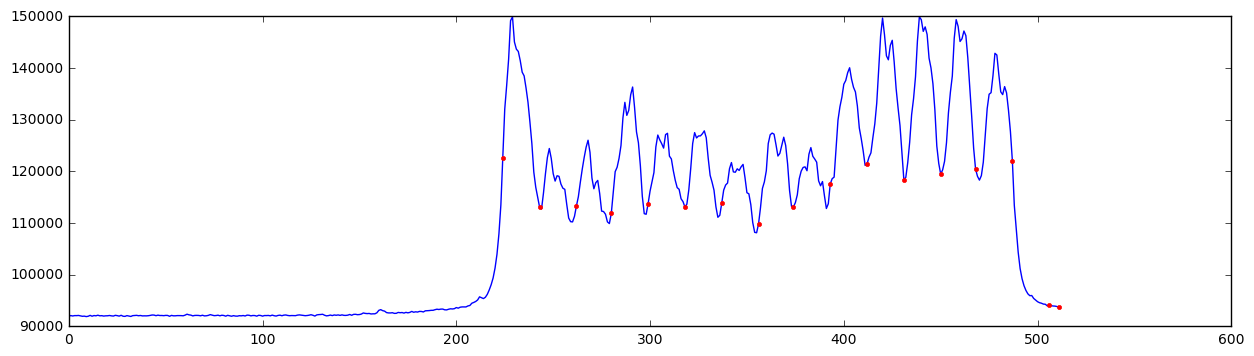

In [10]:
folder=r"C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS\s0429_16 TS"
shot_fn='s0429_16 shot.asc'
ts=TsA.TS_Analysis(folder, shot_fn,['s0429_16 hipower gain 200.asc'])

ts.find_fibre_edges()
#spacing 18.8, offset 224

In [11]:
ne_file=np.genfromtxt(r"C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS\s0429_16 n_e.txt",delimiter=",", skip_header=1,usecols=[1])

'''Split image into fibres'''
ts.split_into_fibres(discard_rows=3)
ts.zero_fibres(upper=1150, lower=850)
a_angle=[90]*14 #here we have fibres 1A through 14A at an angle of 45'
b_angle=[135]*0
ts.pair_fibres(a_angle,b_angle)

[[Model]]
    Model(Skw_nLTE_stray_light_convolve)
[[Fit Statistics]]
    # function evals   = 162
    # data points      = 246
    # variables        = 6
    chi-square         = 104608341.703
    reduced chi-square = 435868.090
    Akaike info crit   = 3200.259
    Bayesian info crit = 3221.291
[[Variables]]
    T_e:      55.5992677 +/- 20.61284 (37.07%) (init= 100)
    T_i:      349.910683 +/- 44.53962 (12.73%) (init= 500)
    V_fi:    -1.2505e+05 +/- 1.80e+03 (1.44%) (init= 0)
    stry:     5041.21059 +/- 469.0148 (9.30%) (init= 100)
    amp:      6424.07166 +/- 161.1718 (2.51%) (init= 3000)
    offset:   1365.49980 +/- 60.43364 (4.43%) (init= 120)
[[Correlations]] (unreported correlations are <  0.100)
    C(T_e, T_i)                  = -0.744 
    C(T_e, amp)                  = -0.587 
    C(T_i, stry)                 = -0.499 
    C(T_e, offset)               = -0.483 
    C(V_fi, stry)                = -0.399 
    C(T_i, amp)                  =  0.359 
    C(T_e, stry)         

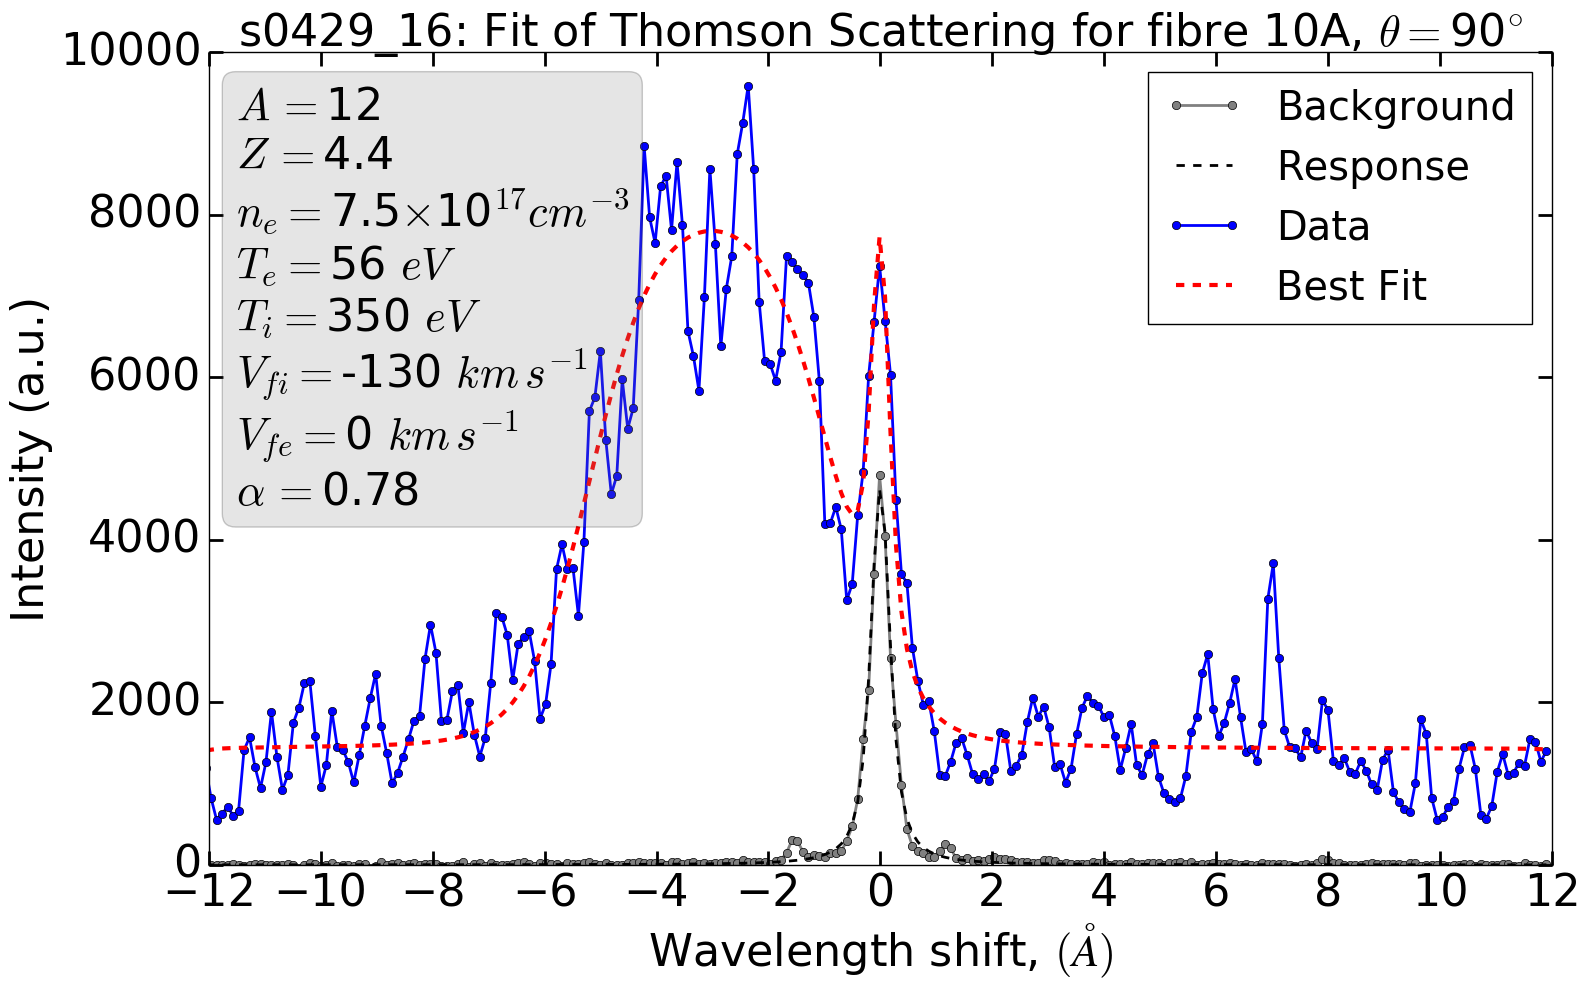

In [28]:
'''
Specify the plasma parameters in the form (V
alues, Minimum, Independent)
If Independent is True, then the value is fixed and minimum has no meaning
If Independent is False, then the value is an initial guess for the fit
and minimum is either a float, or None to specify no given minimum
For multi-species fits, Aj, Zj and Fj only can have their value as a tuple (A1,A2...Aj)
Even for a single-species fit, enclose A, Z and F in (), eg. 'Aj':((12), True, None)
'''
'''Choose the fibre to fit'''
Fnum=10
Fset='A'

ne=ne_file[Fnum-1]


plasma_parameters={ 'model': 'nLTE',
                    'n_e': (ne,True),#in cm^-3, must be specified
                    'T_e': (100, False,1),#In electron volts. 
                    'V_fe':(0, True),#m/s.
                    'A':  ((12,), True),#in nucleon masses, must be specified
                    'T_i': (500, False,1),#In electron volts.
                    'V_fi':(0, False),#m/s.
                    'stry':(100, False,0), #Fraction of signal made up of stray light. >0, <1.0!!
                    'amp': (3000, False,0), #Fraction of signal made up of spectrum.
                    'offset': (120, False), #
                    'shift': (0, True)
                    }

'''This code fits and plots the result'''
f=ts.select_fibre(Fnum,Fset)
f.voigt_response()
f.fit_fibre(plasma_parameters)
ts.pretty_plot(Fnum,Fset, tm=1.6, sr=12)
print(f.skw_res.fit_report())

In [5]:
ts.fig.savefig('Figures/s0611_15 fibre 8A largetext.pdf')

In [29]:
f.export_data('s0429_16 TS F10A')

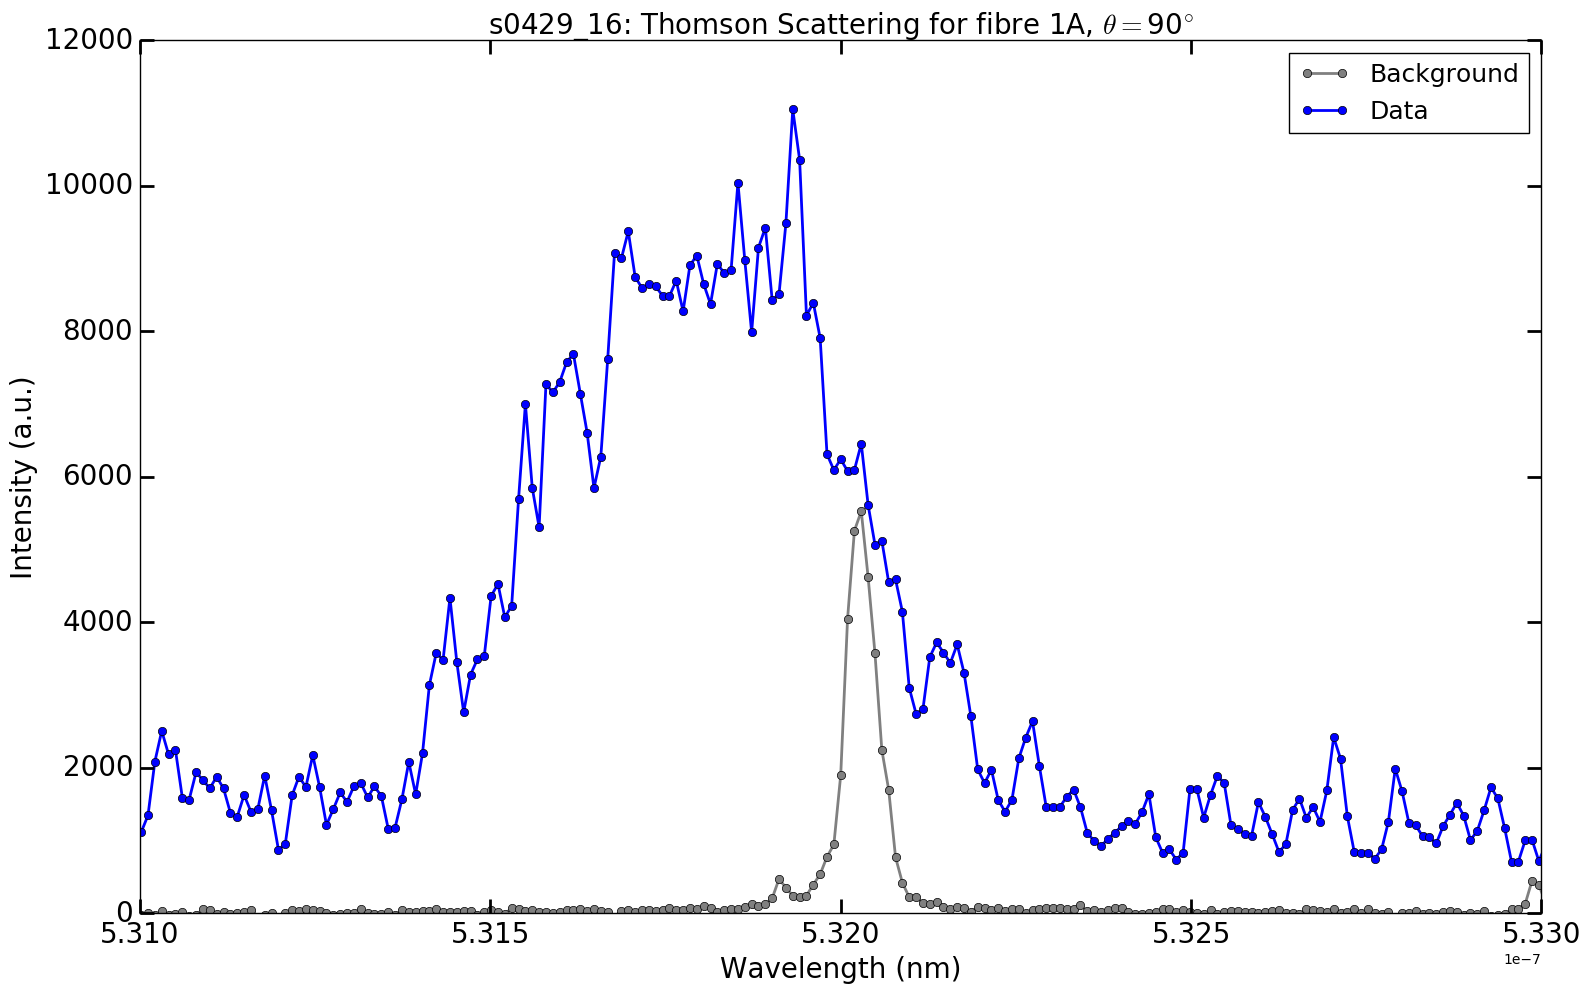

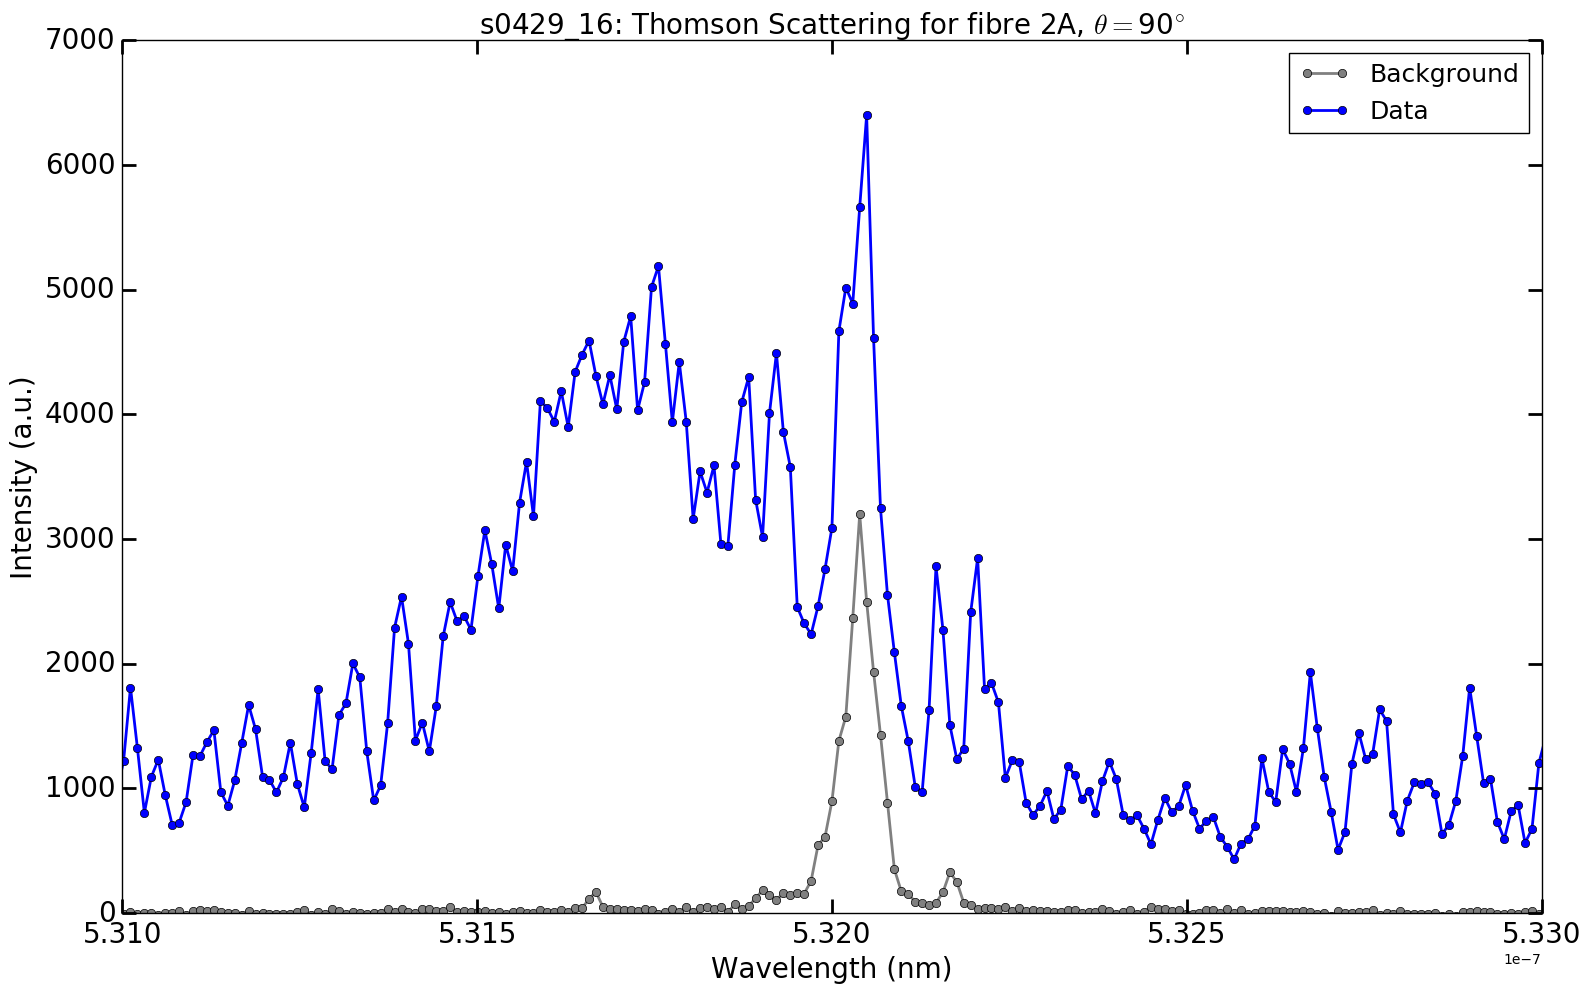

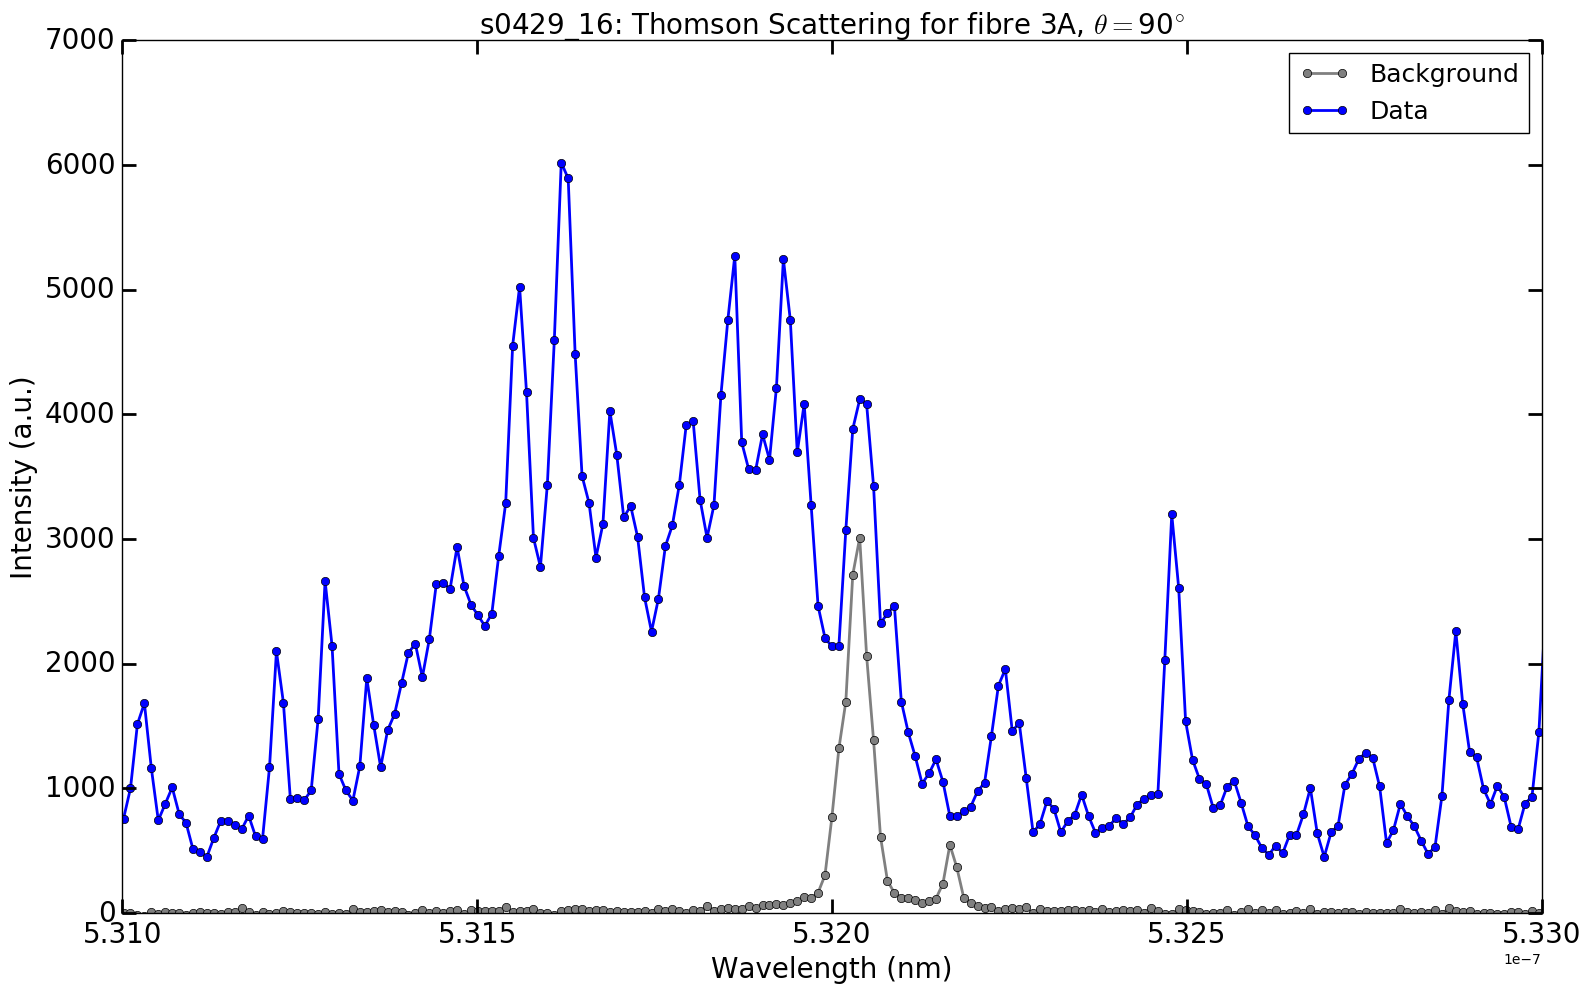

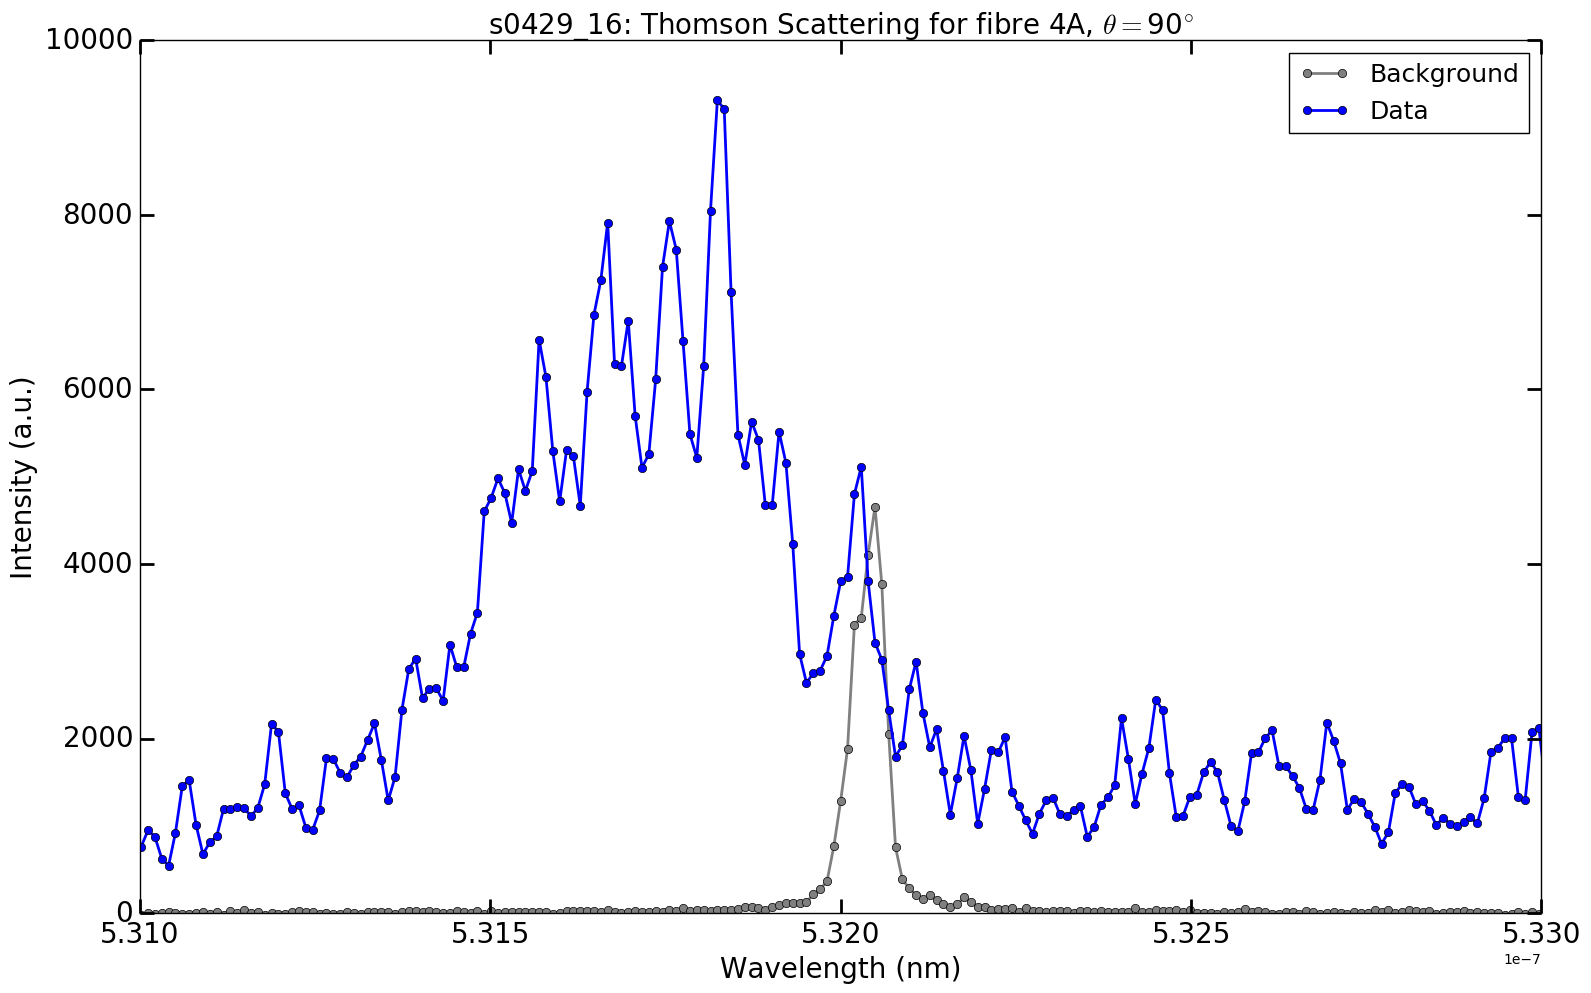

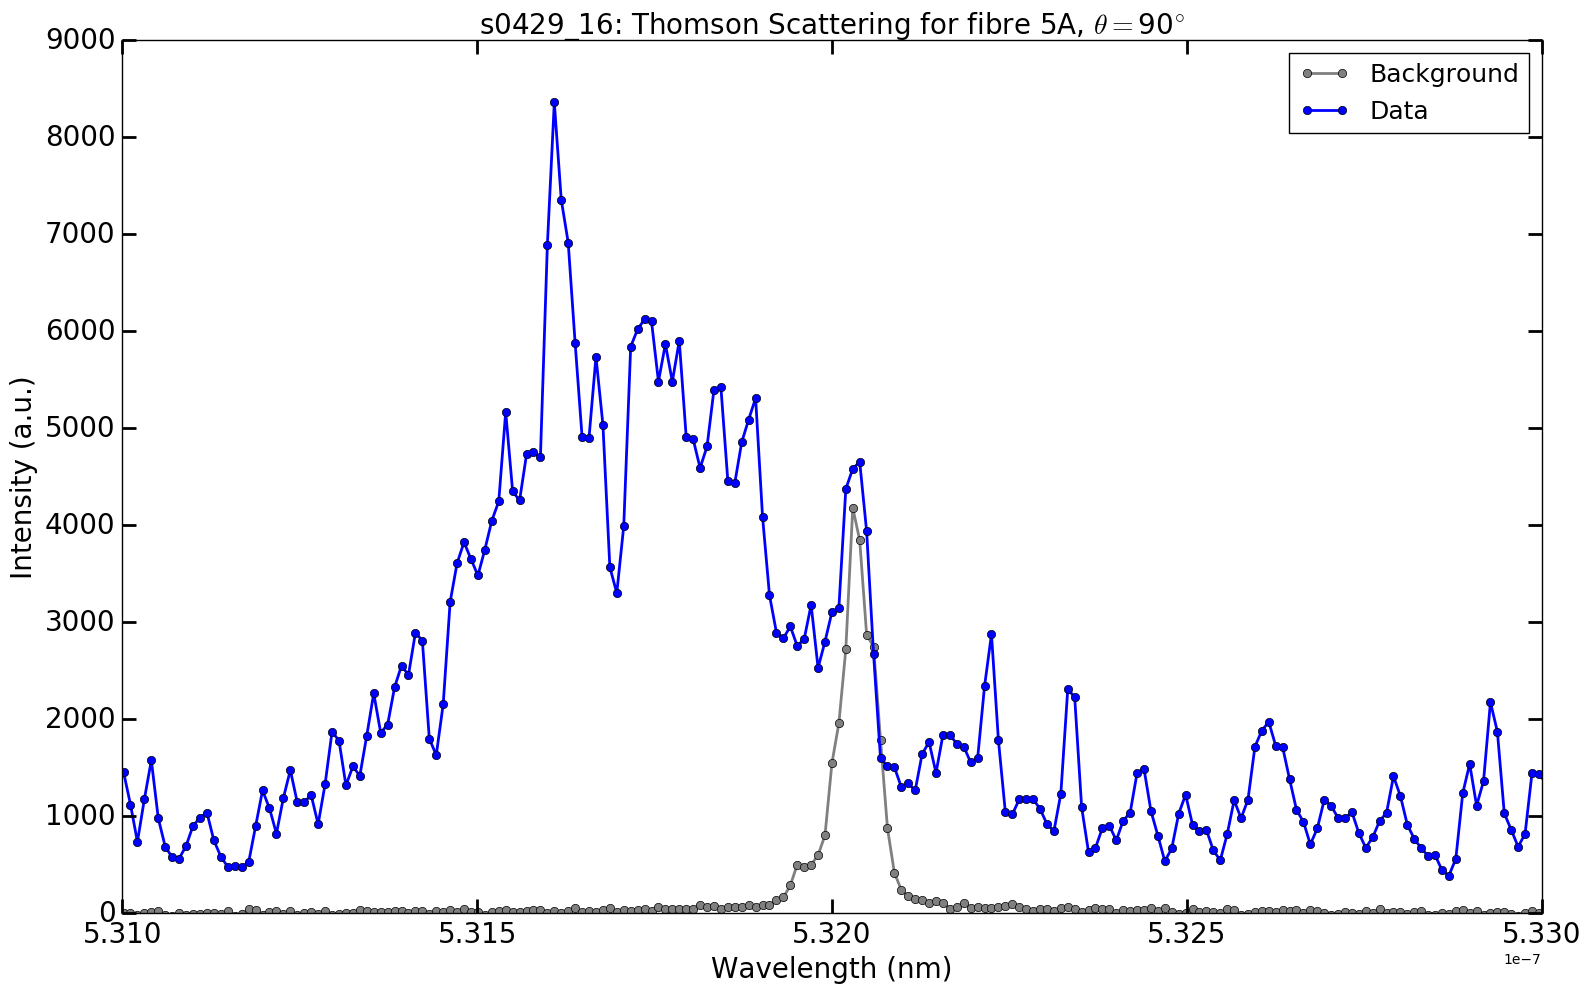

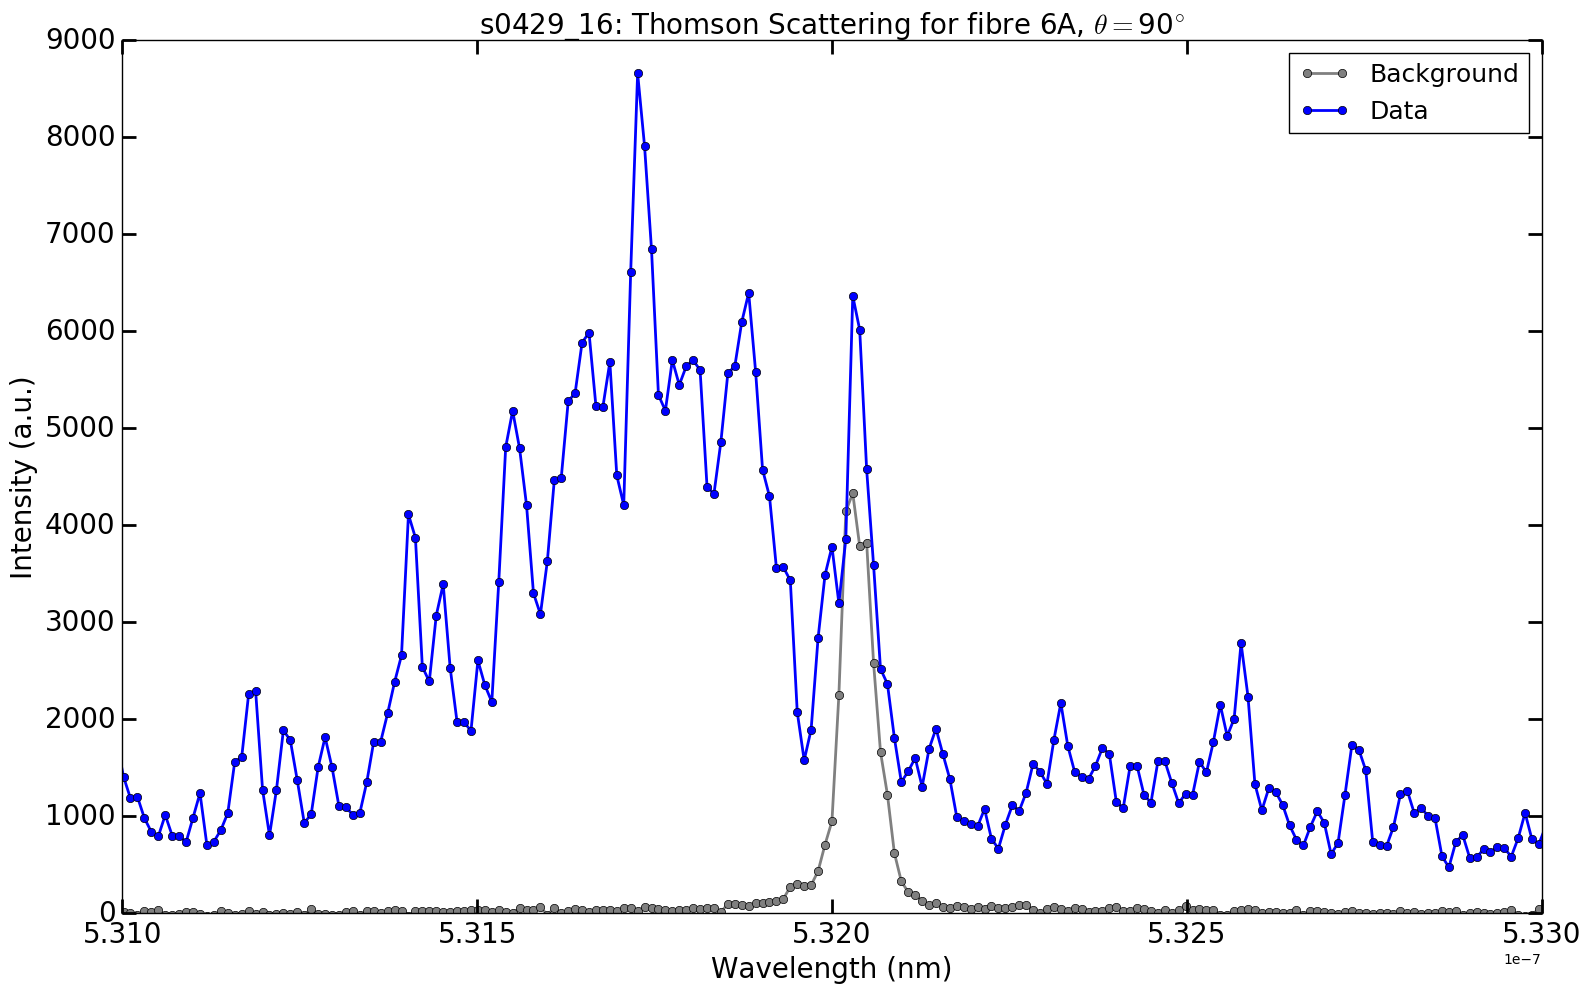

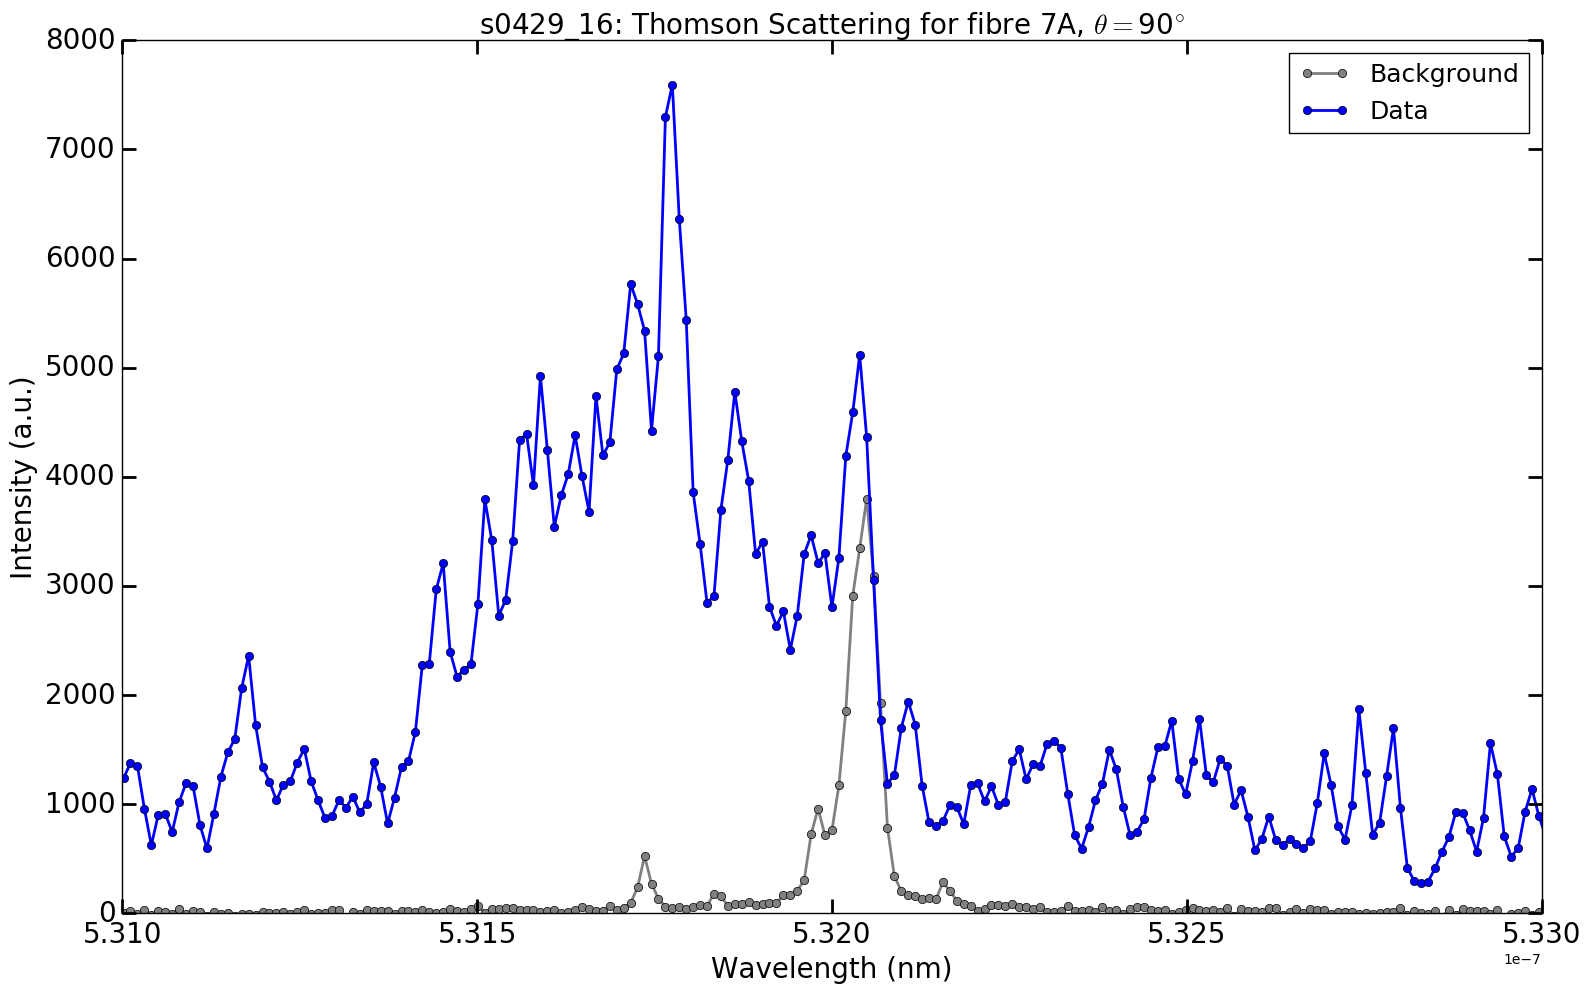

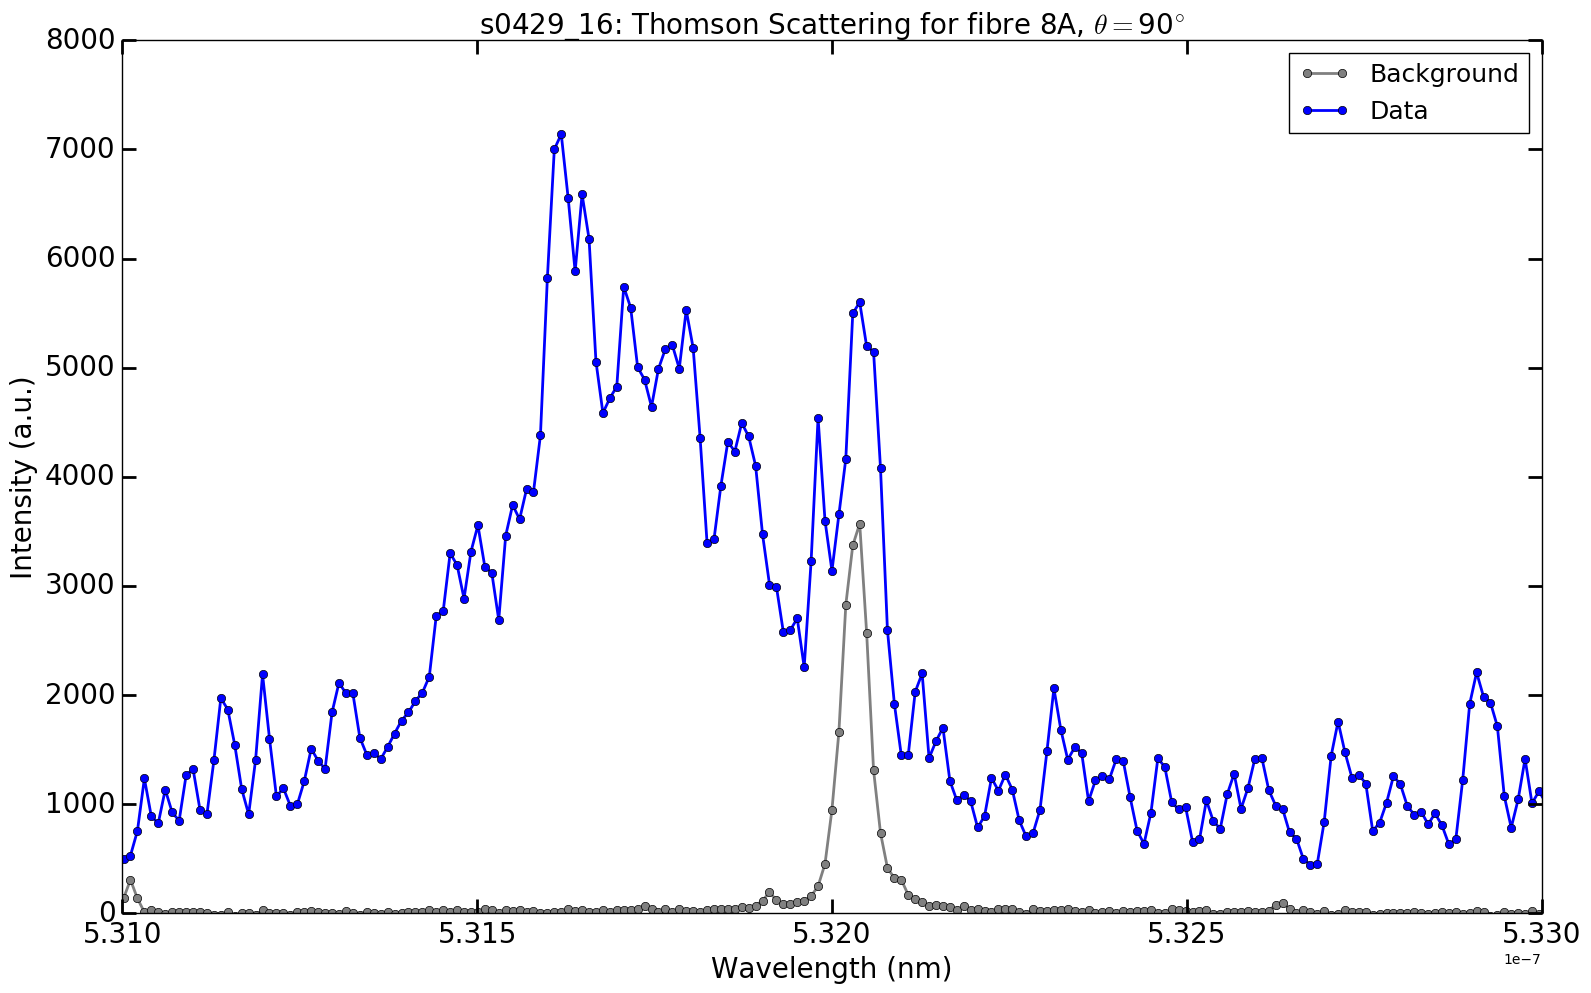

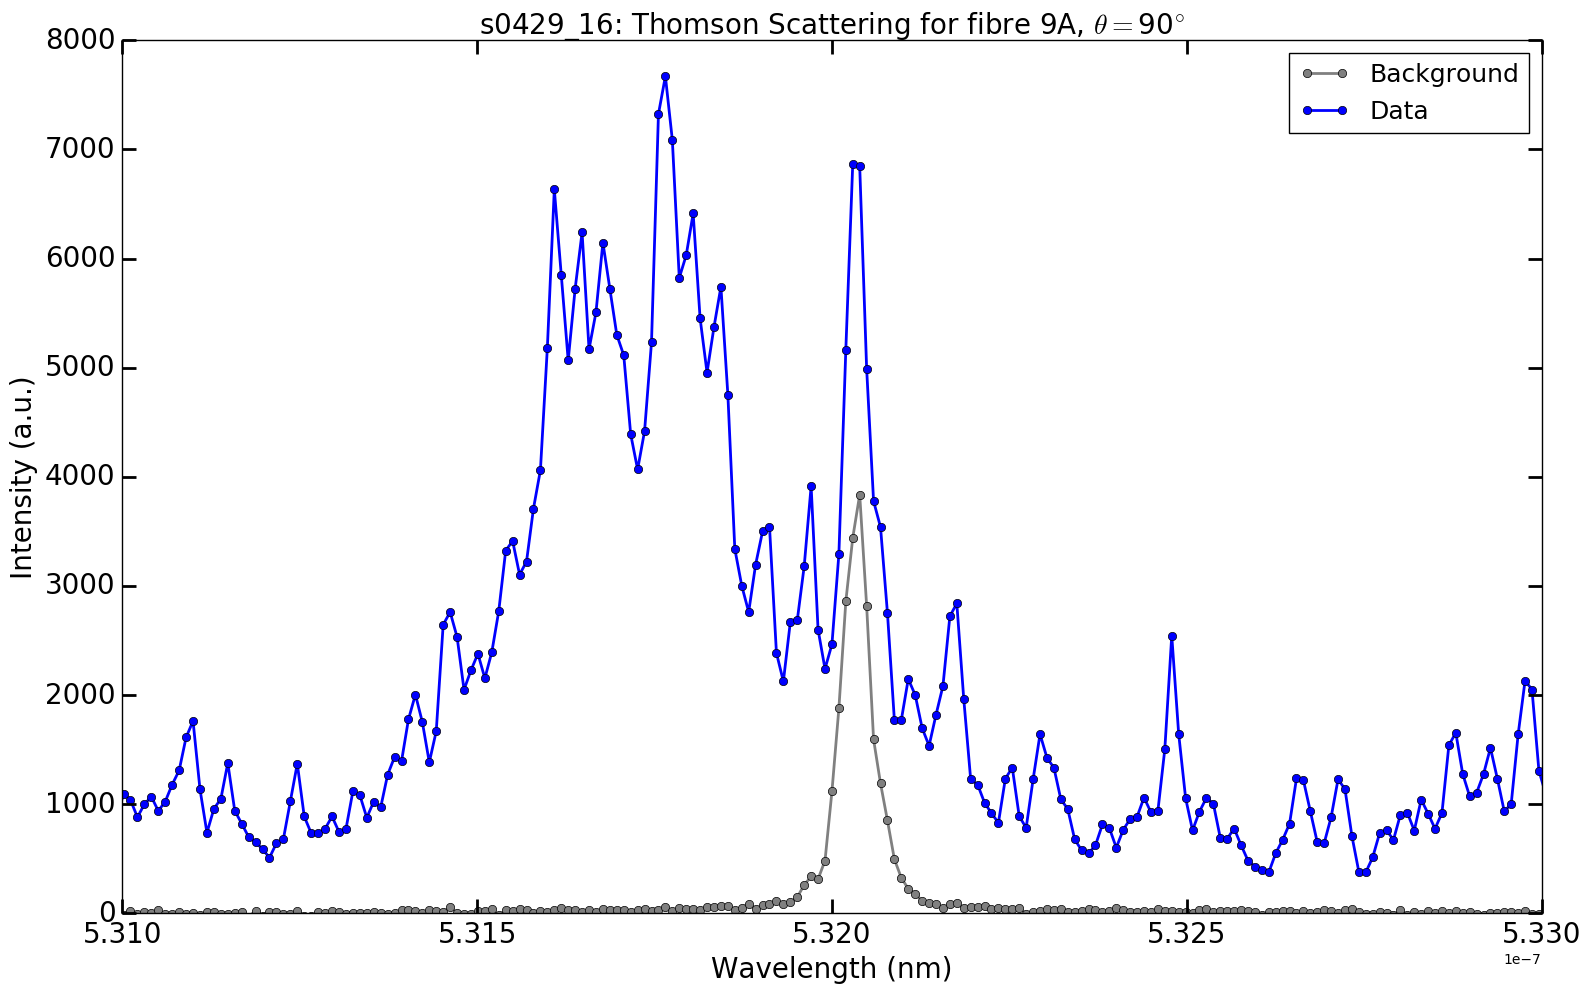

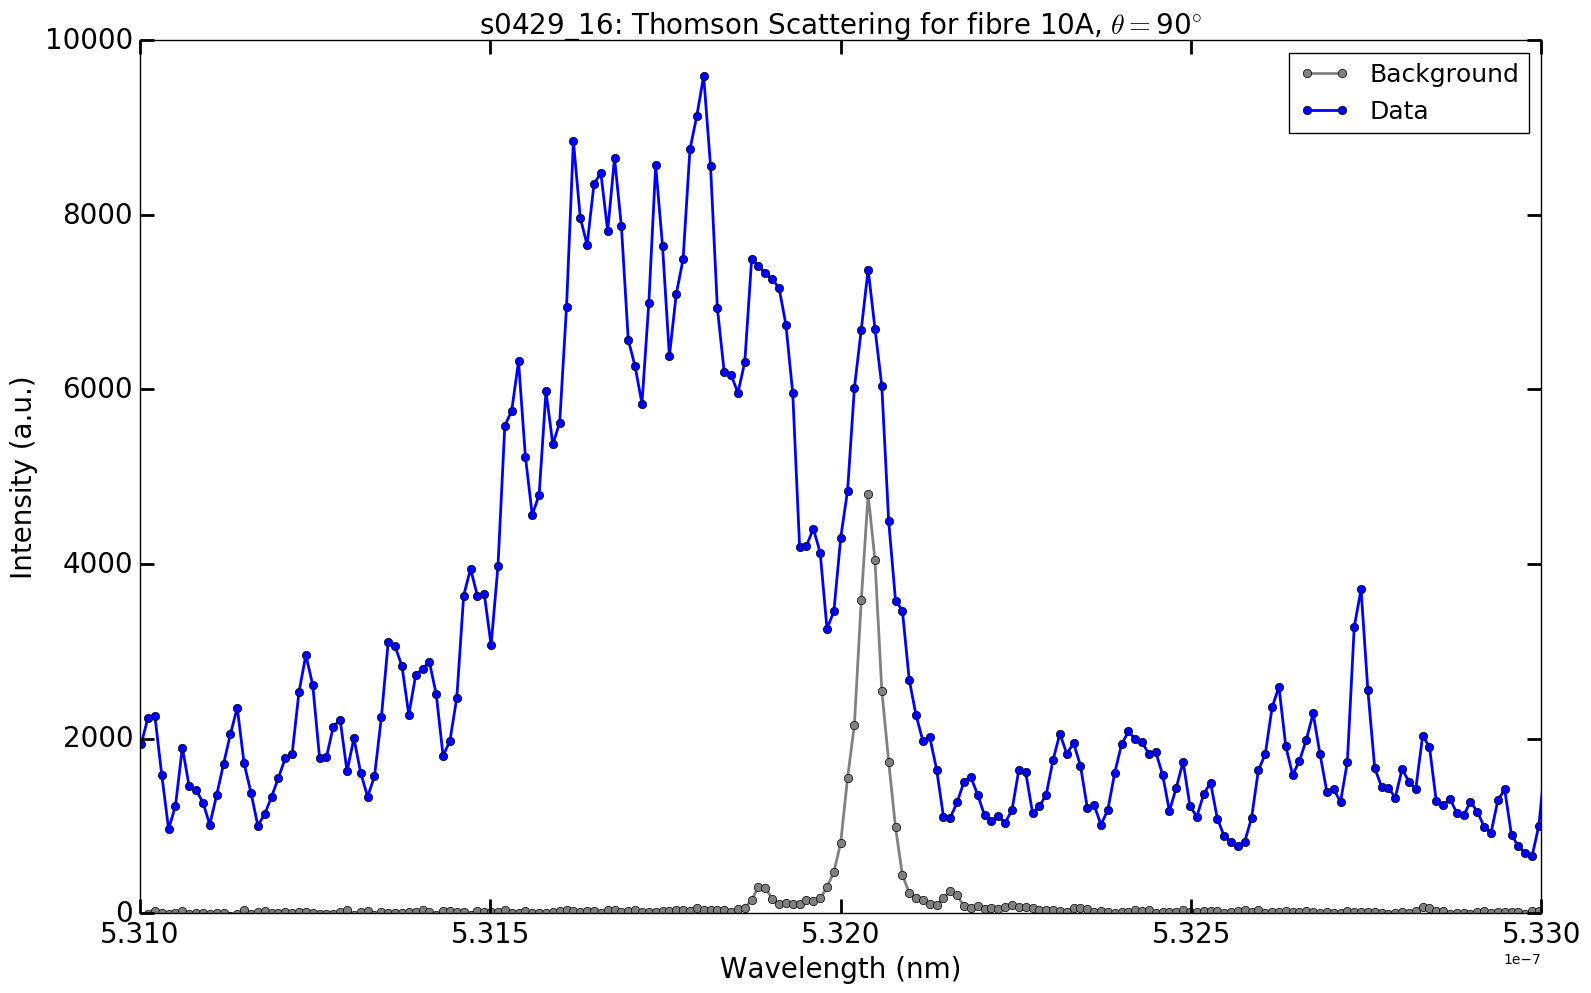

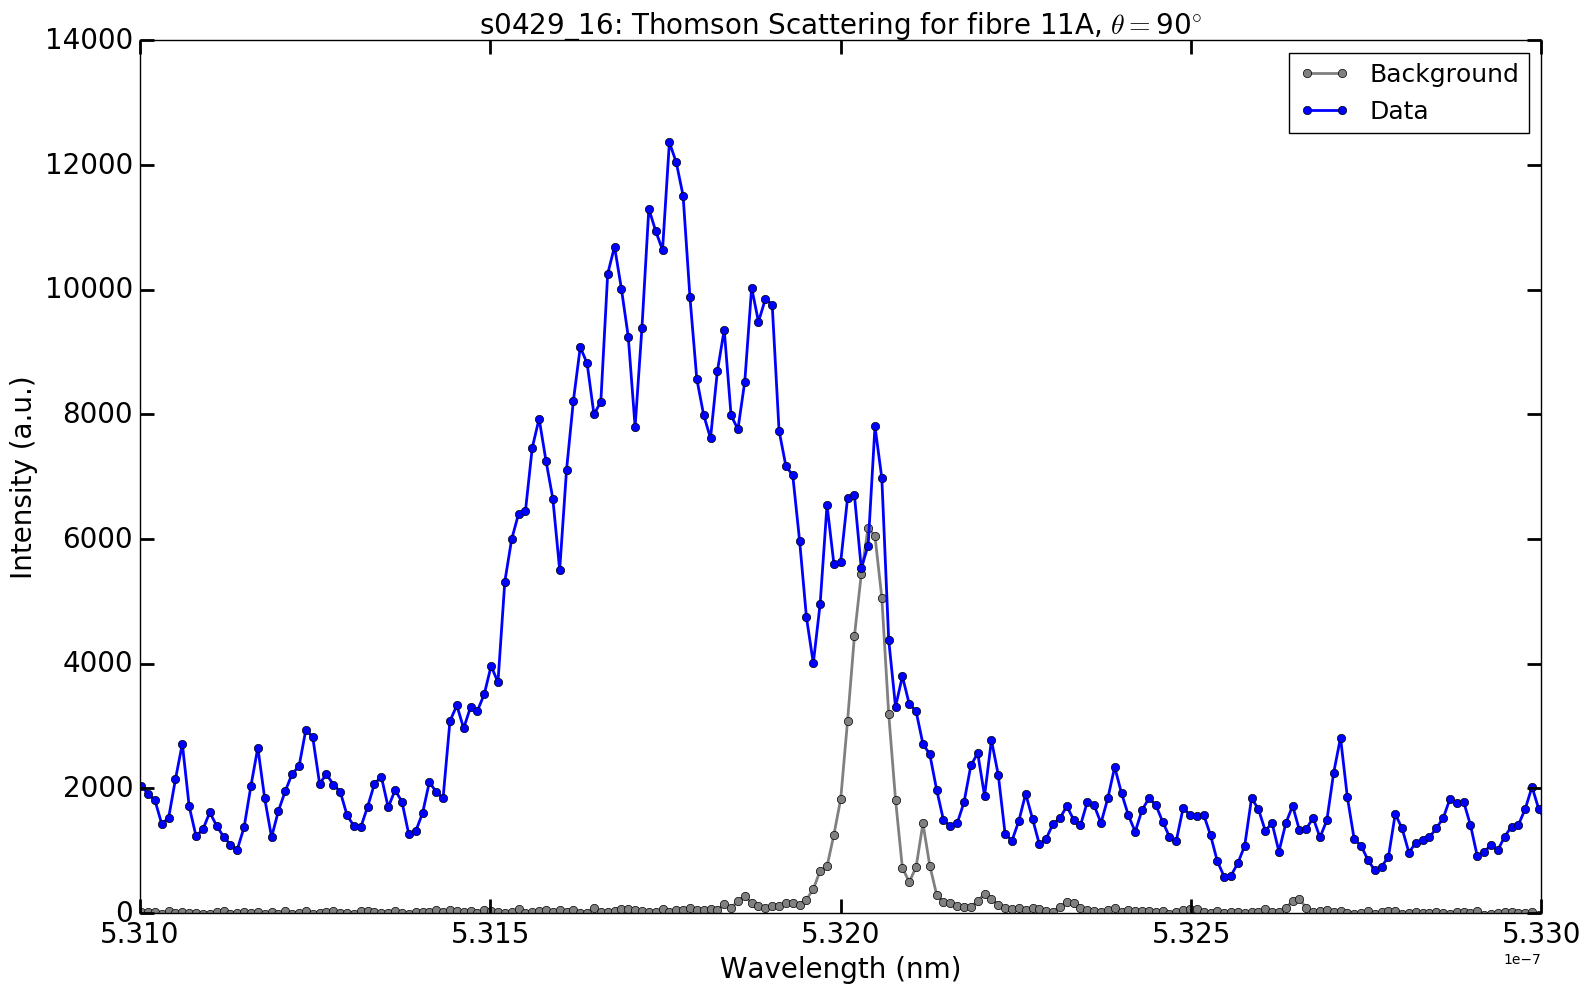

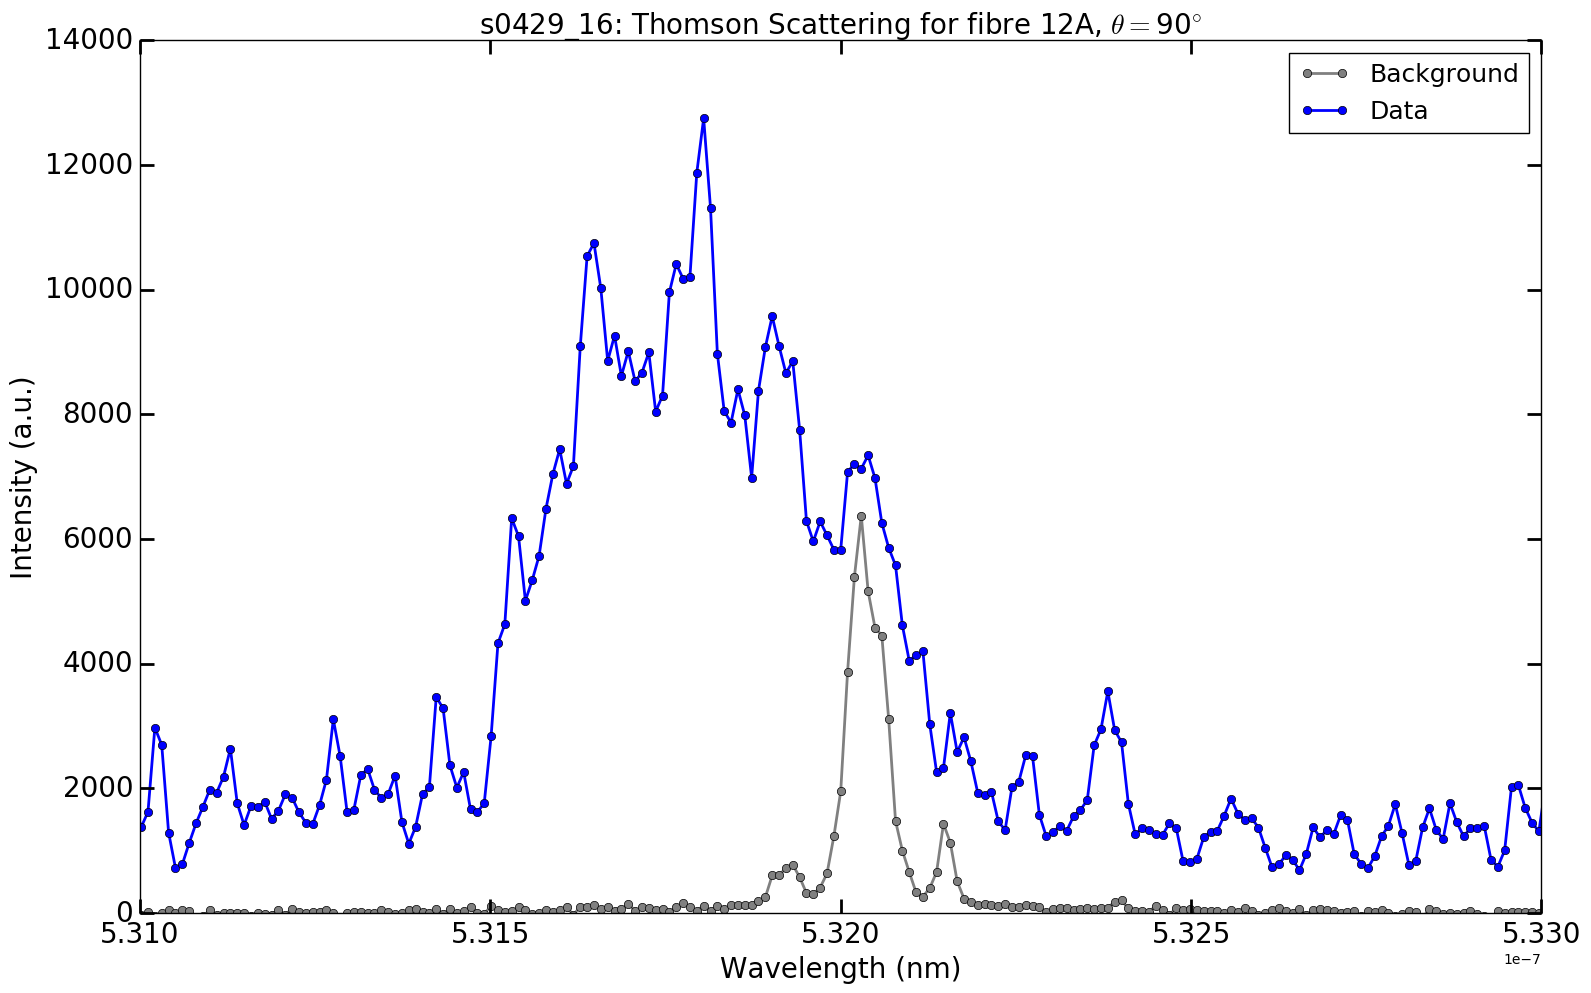

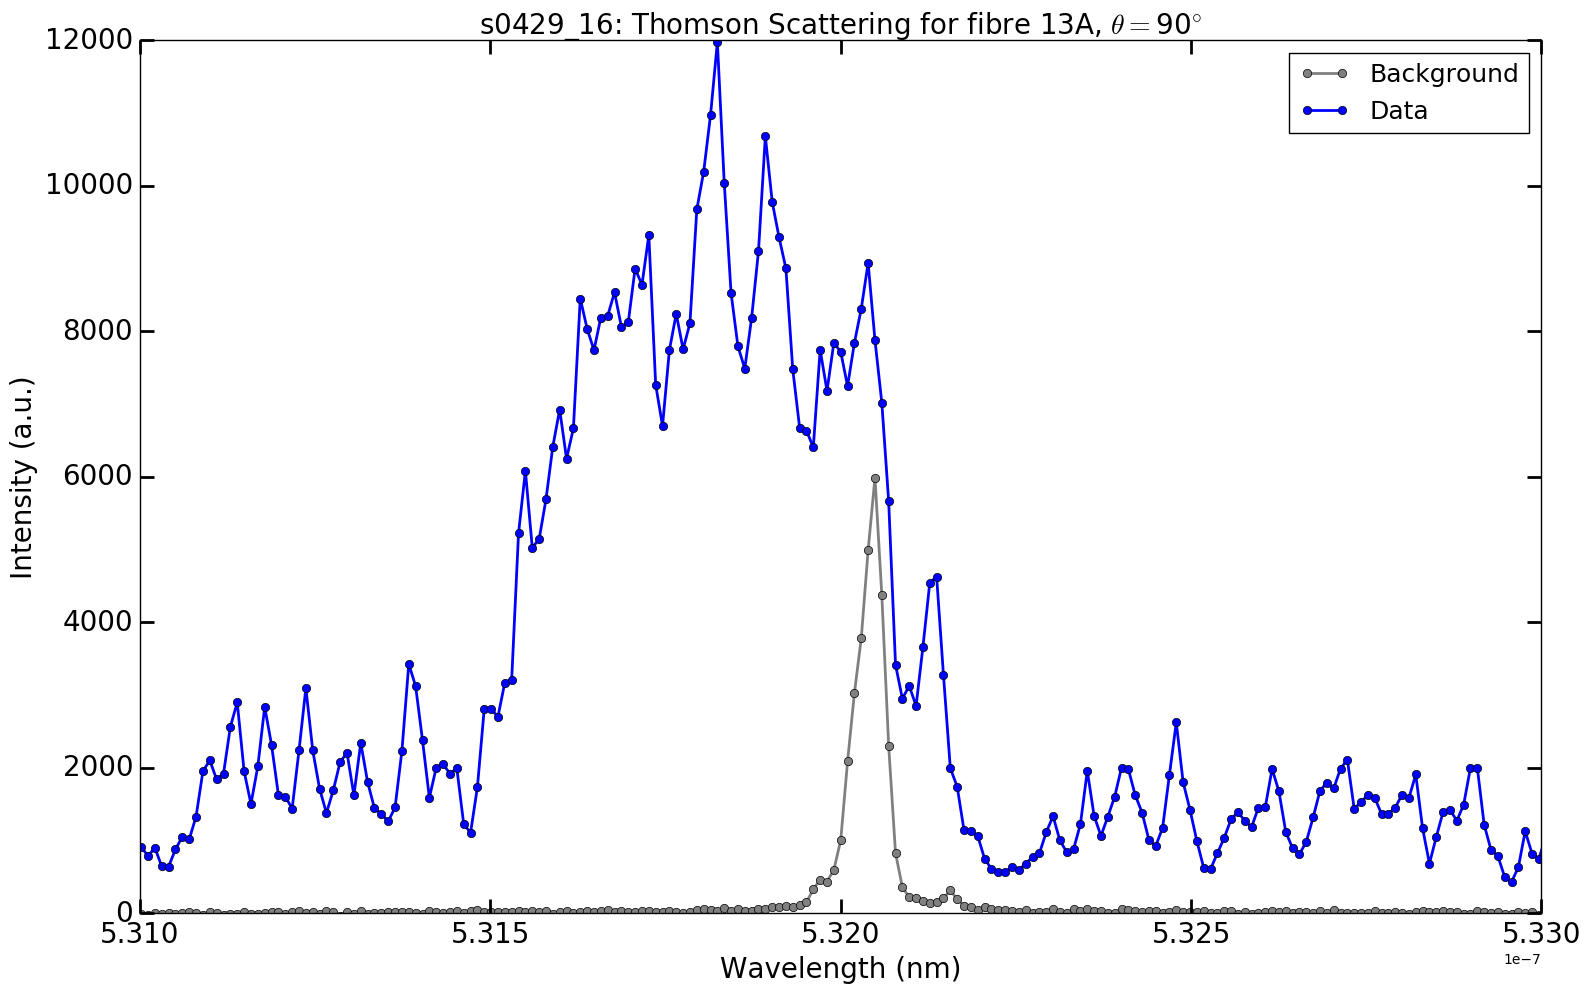

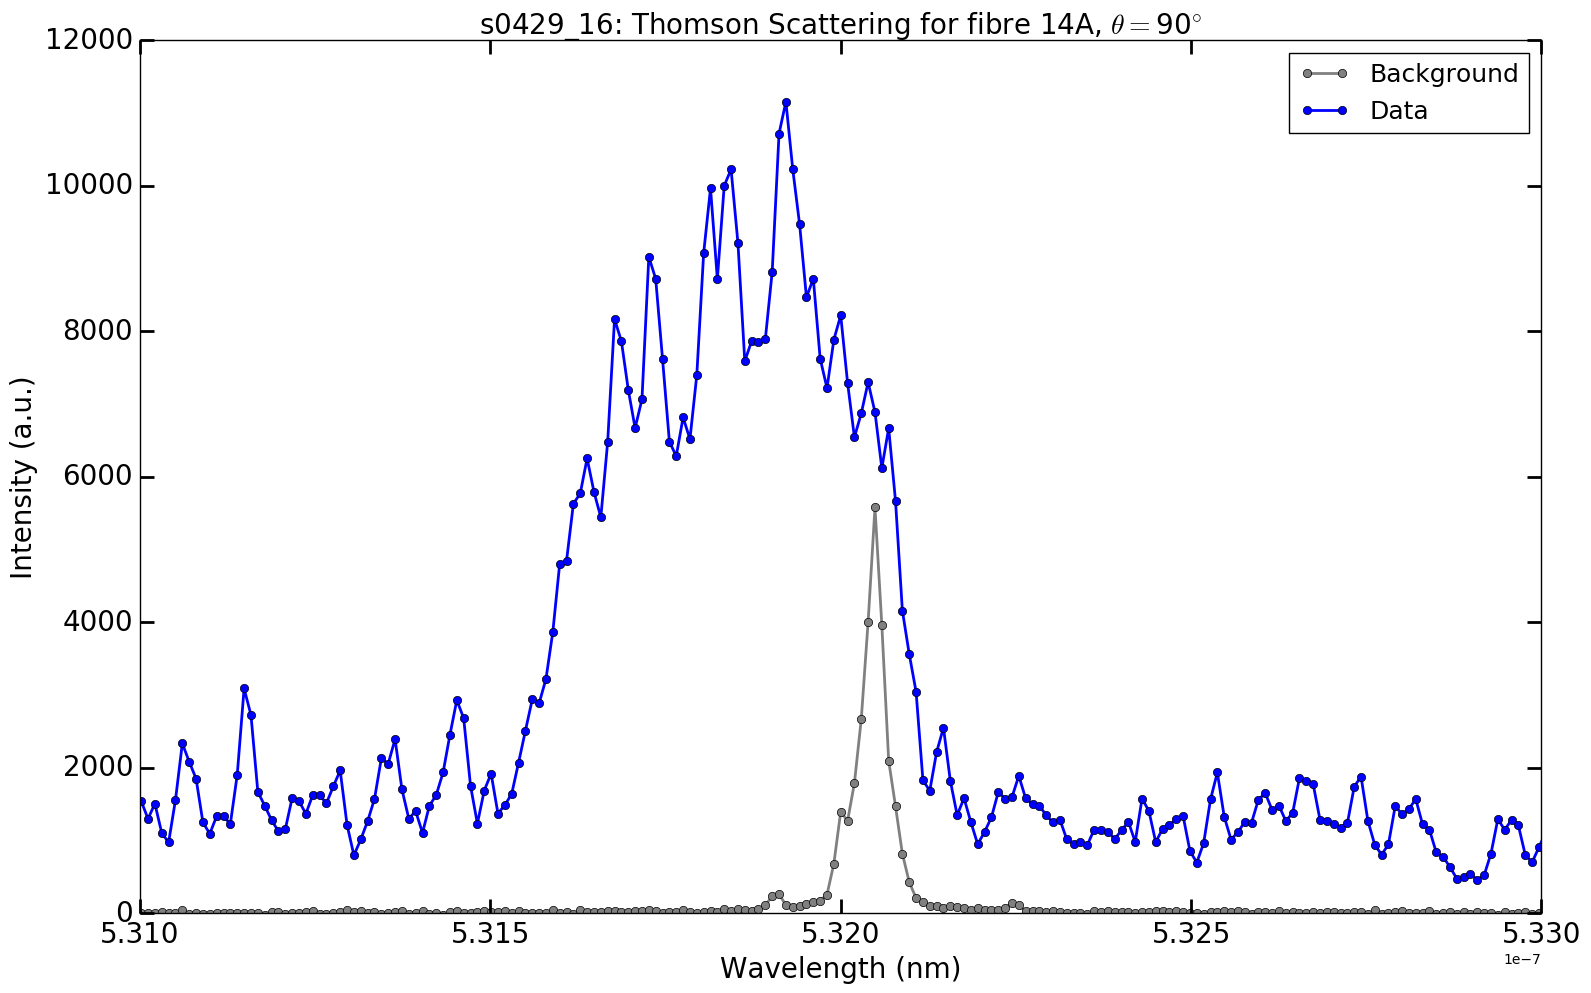

In [4]:
for i in range(1,15):
    ts.plot_data(Fnum=i, Fset='A')

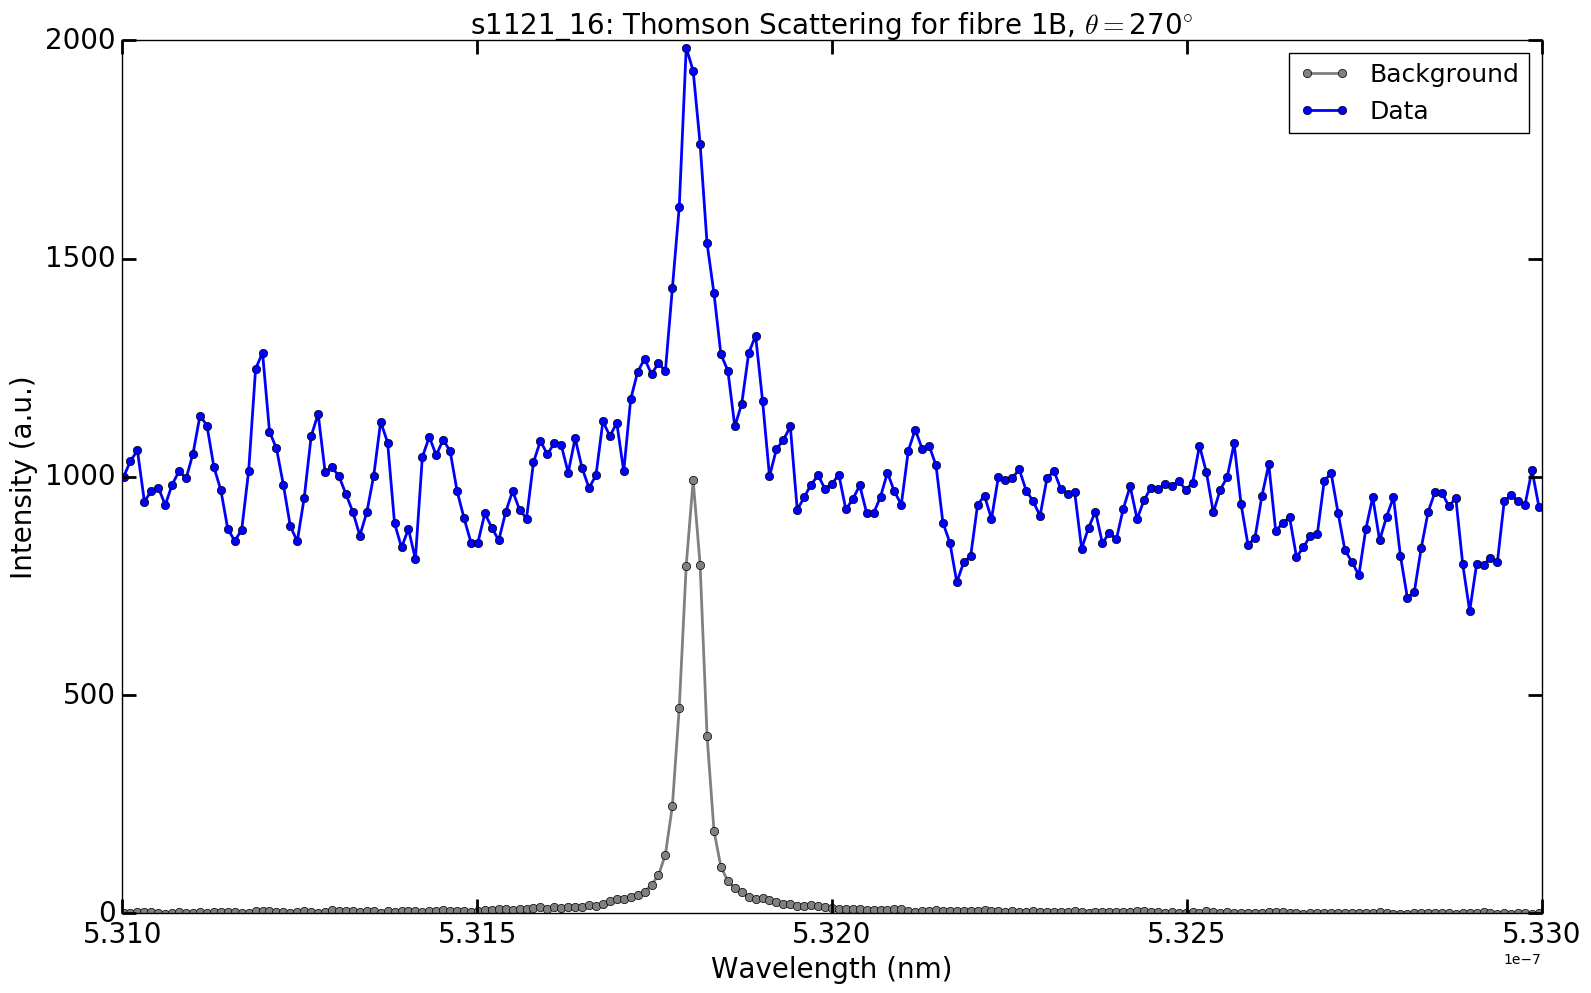

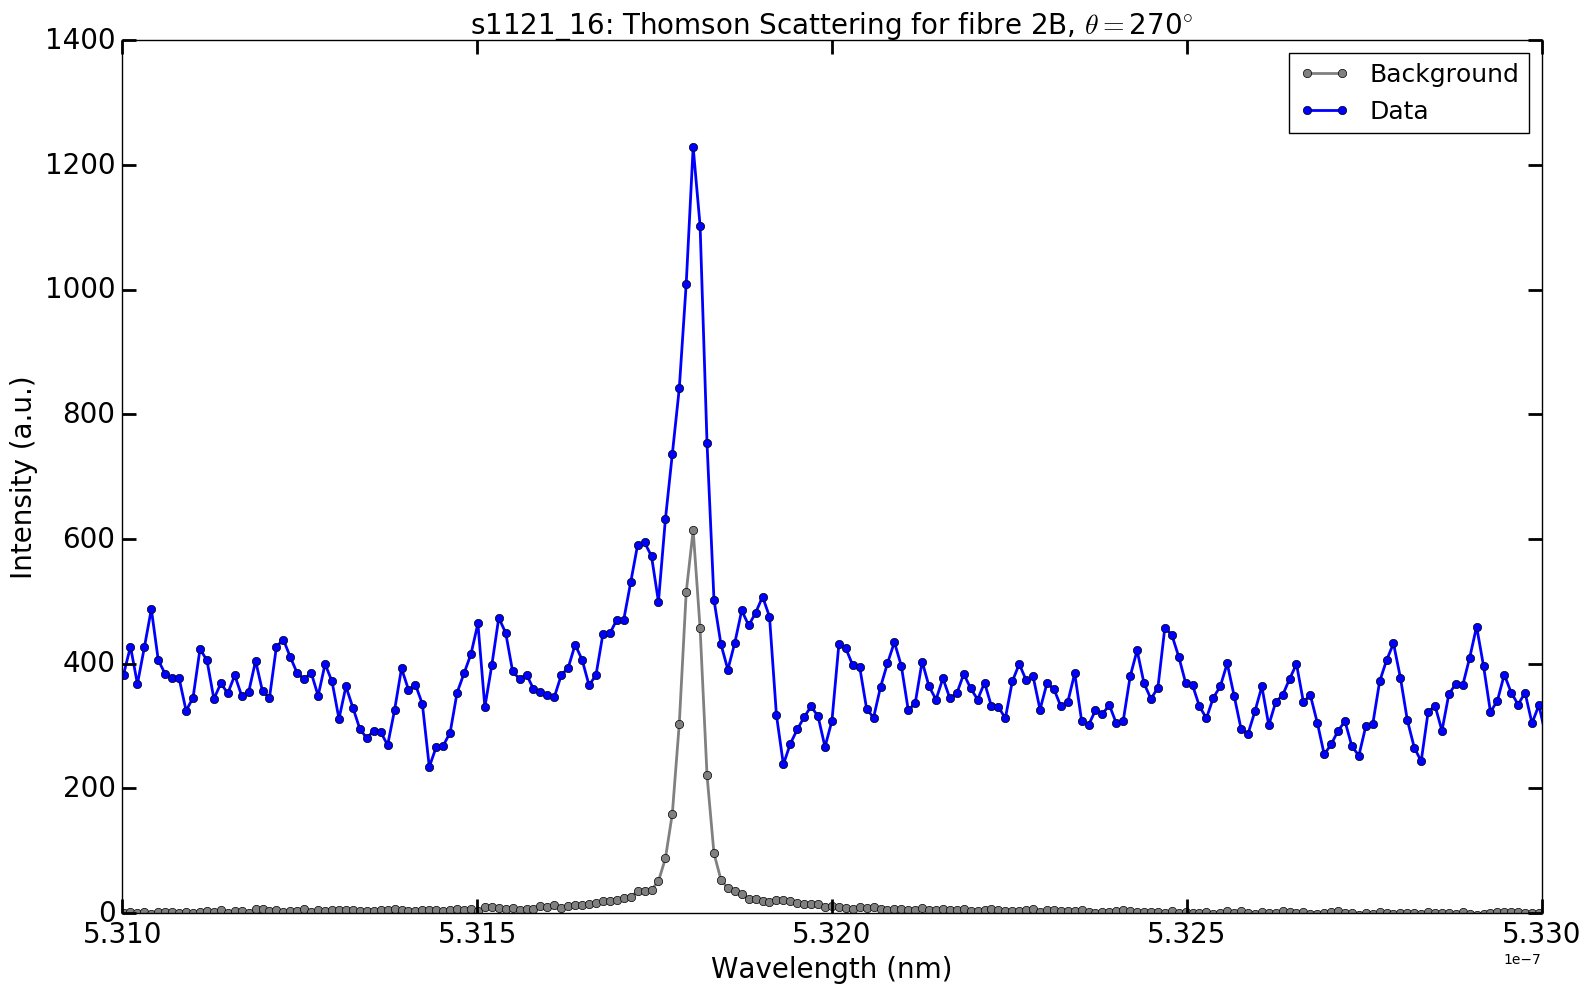

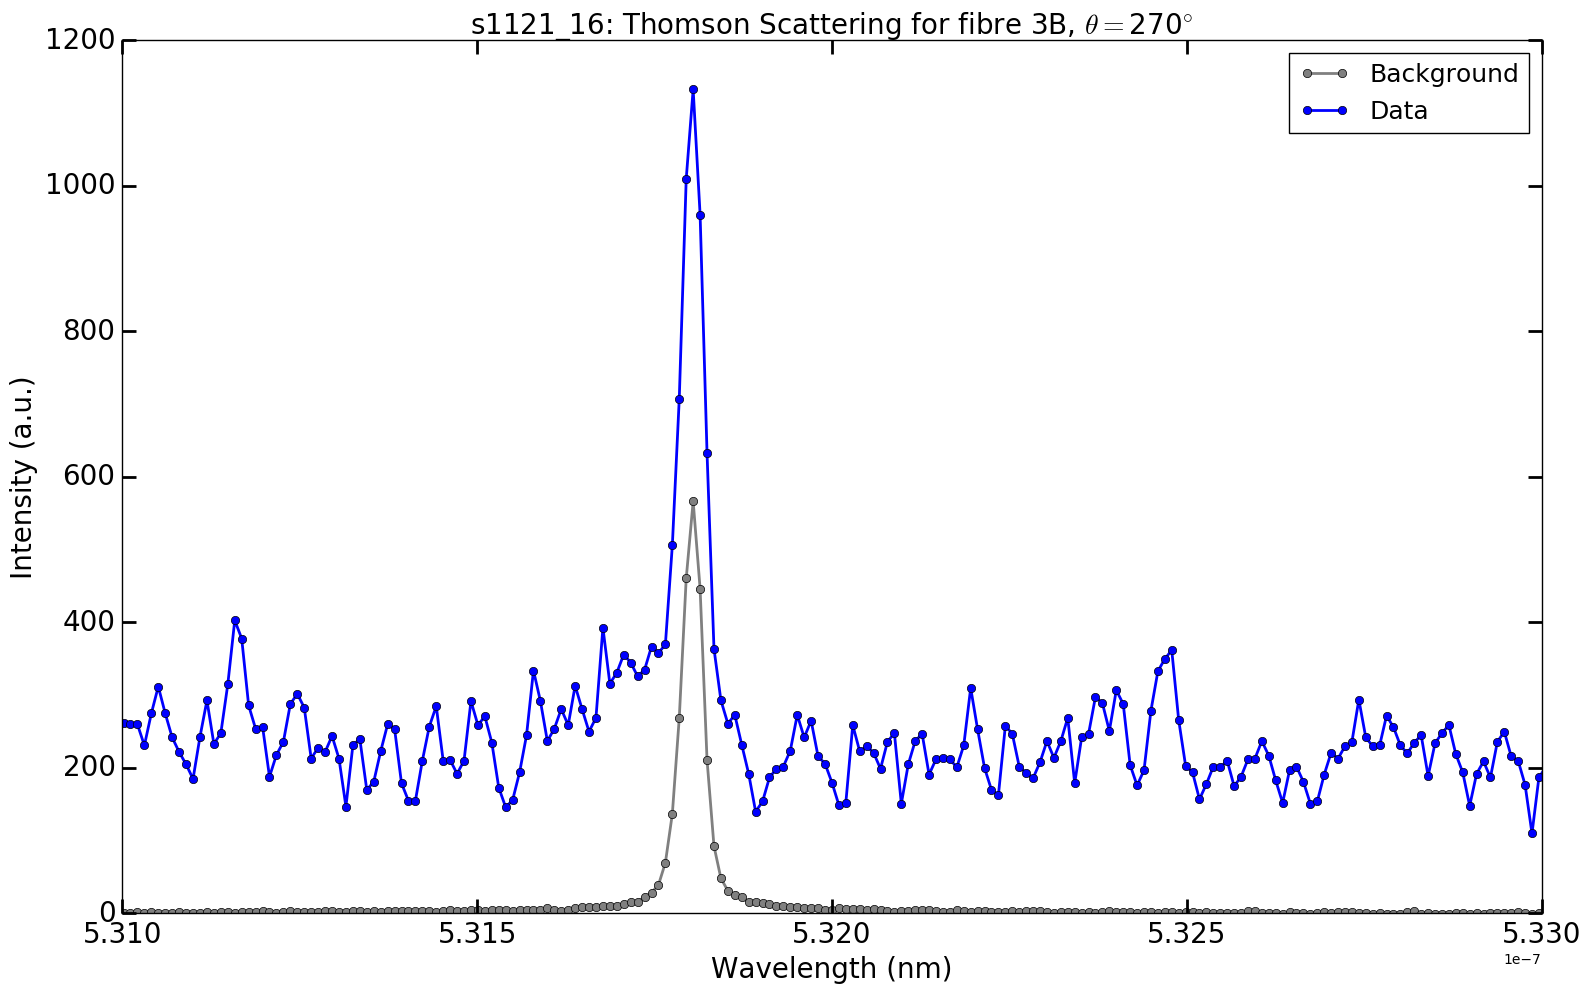

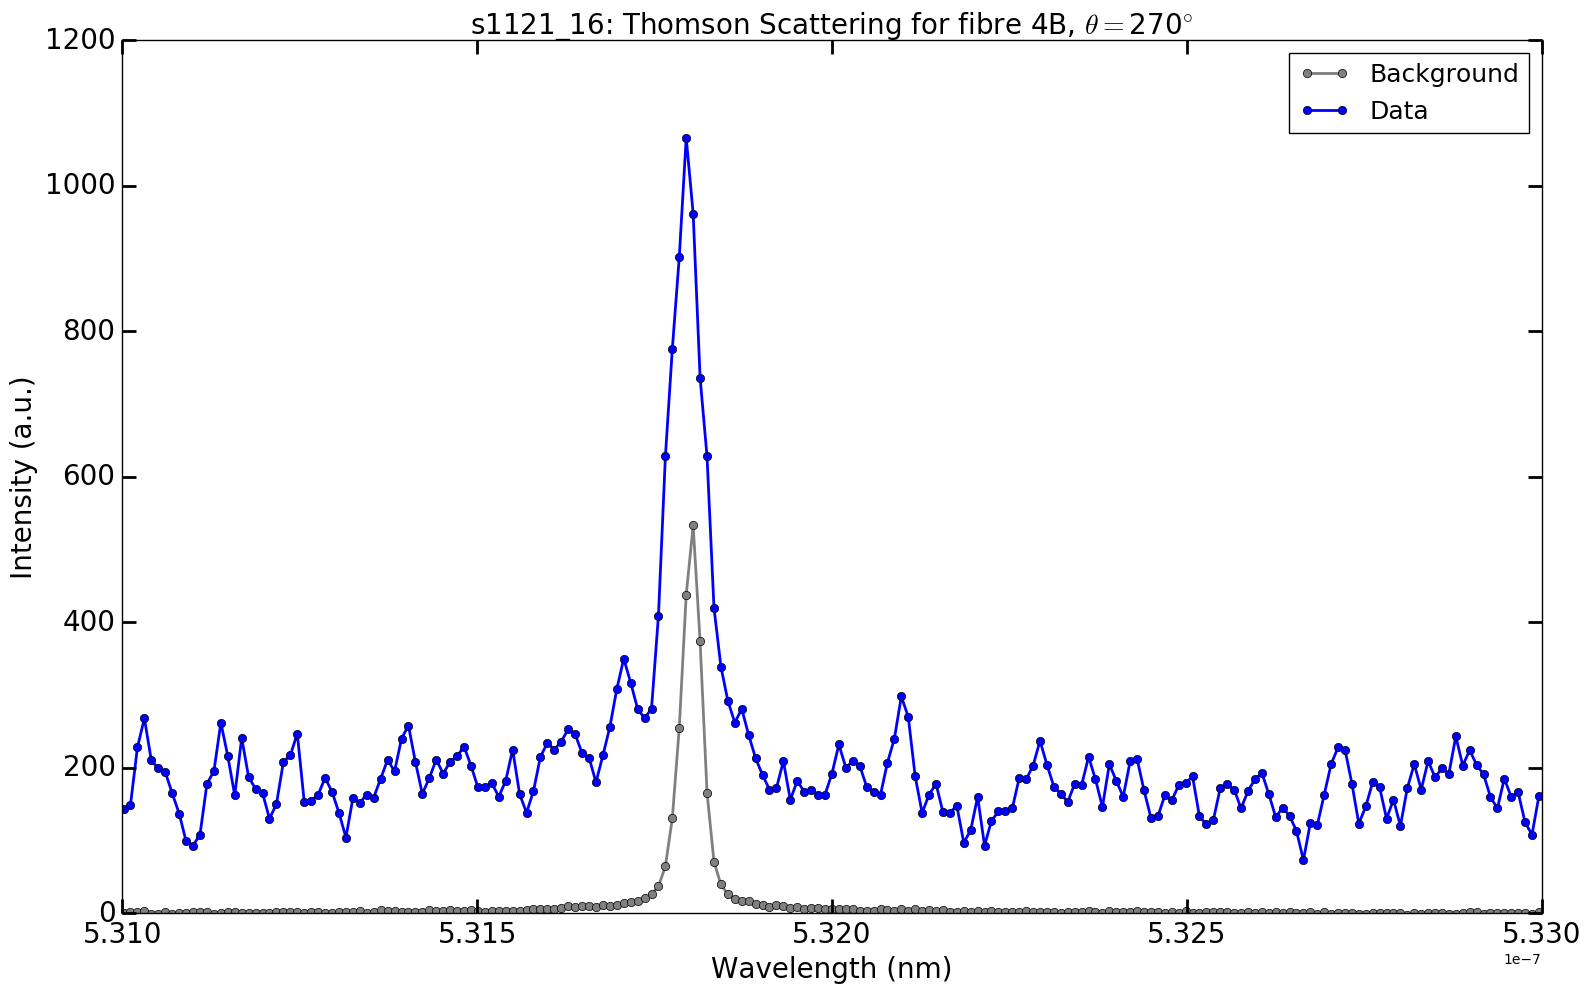

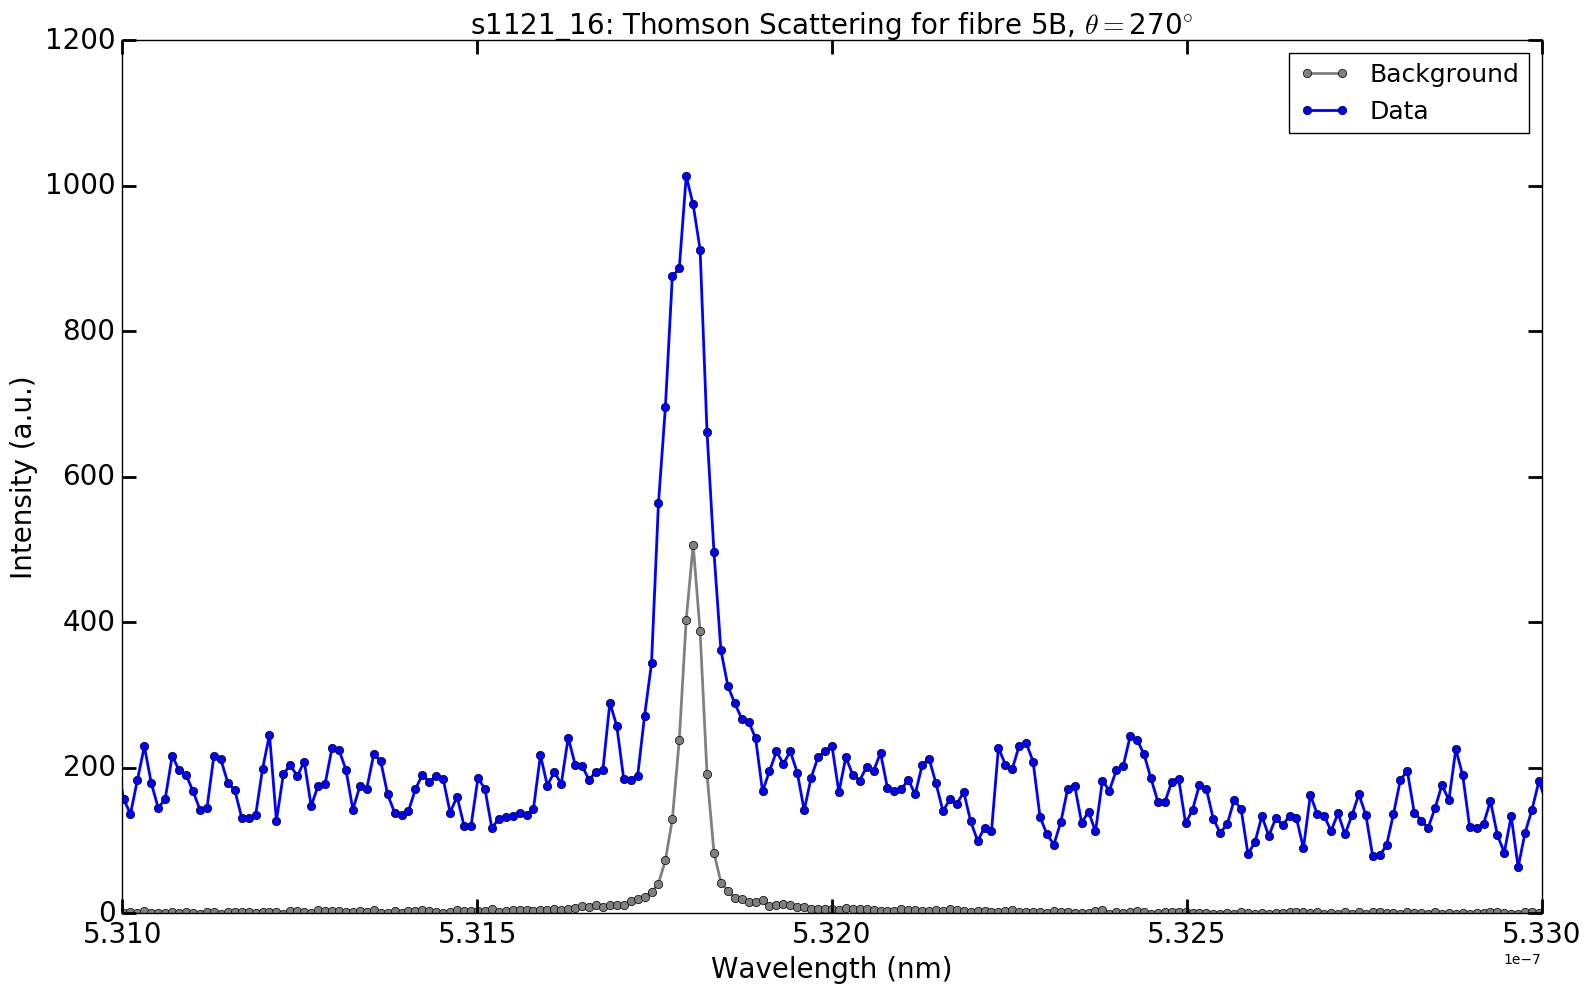

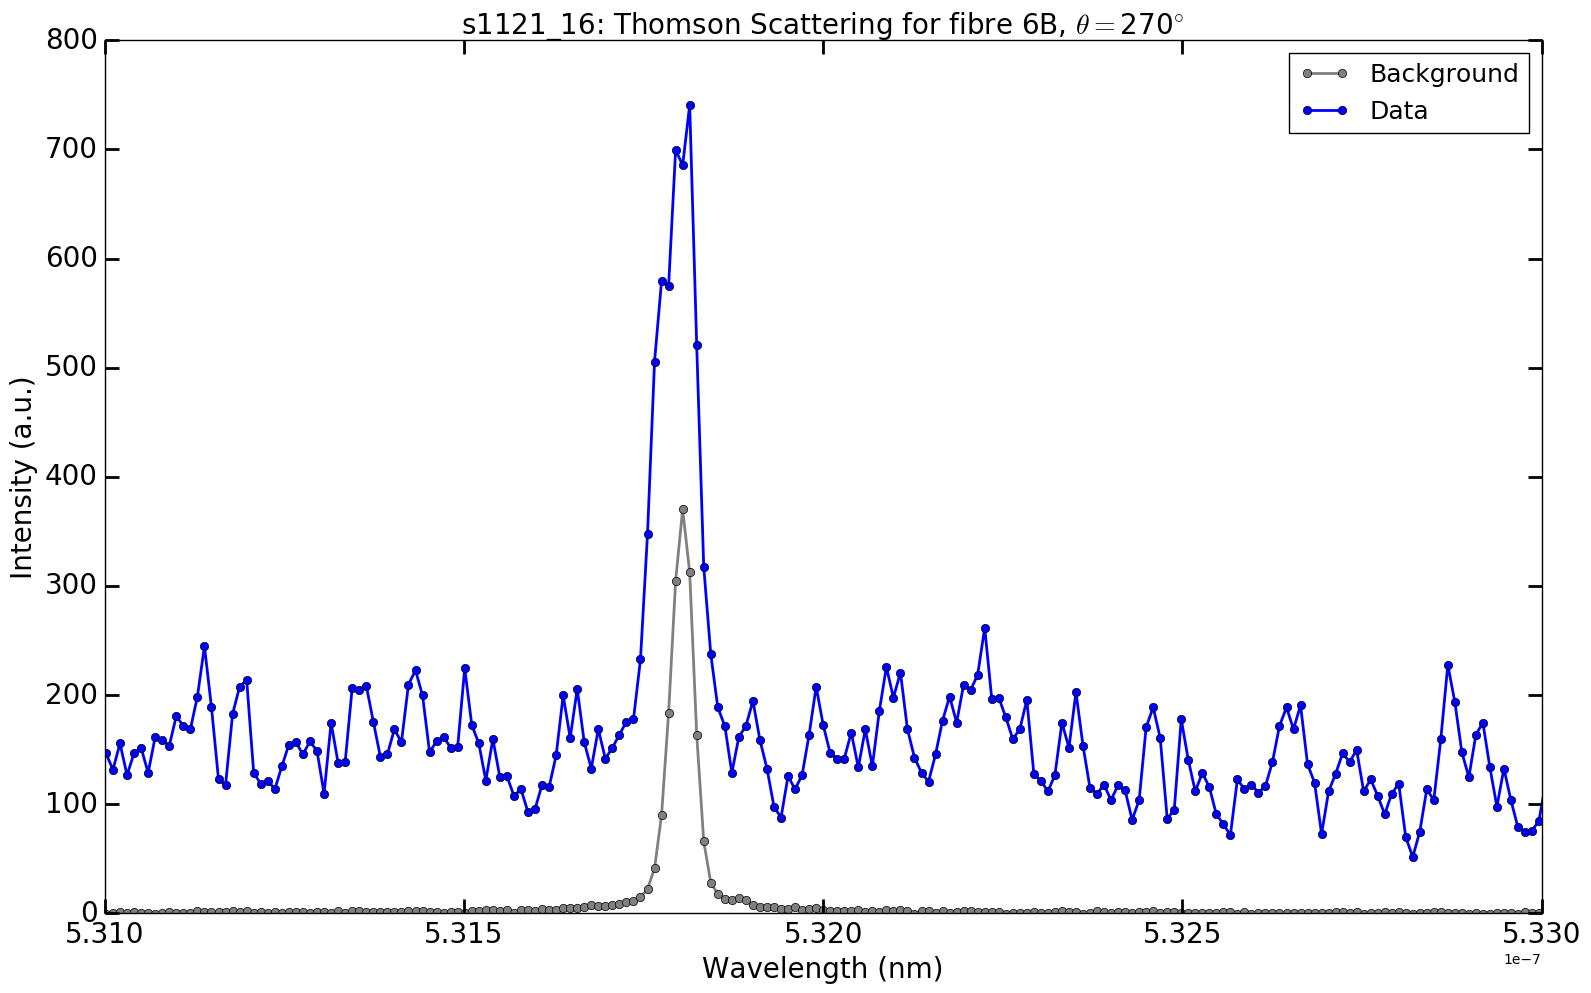

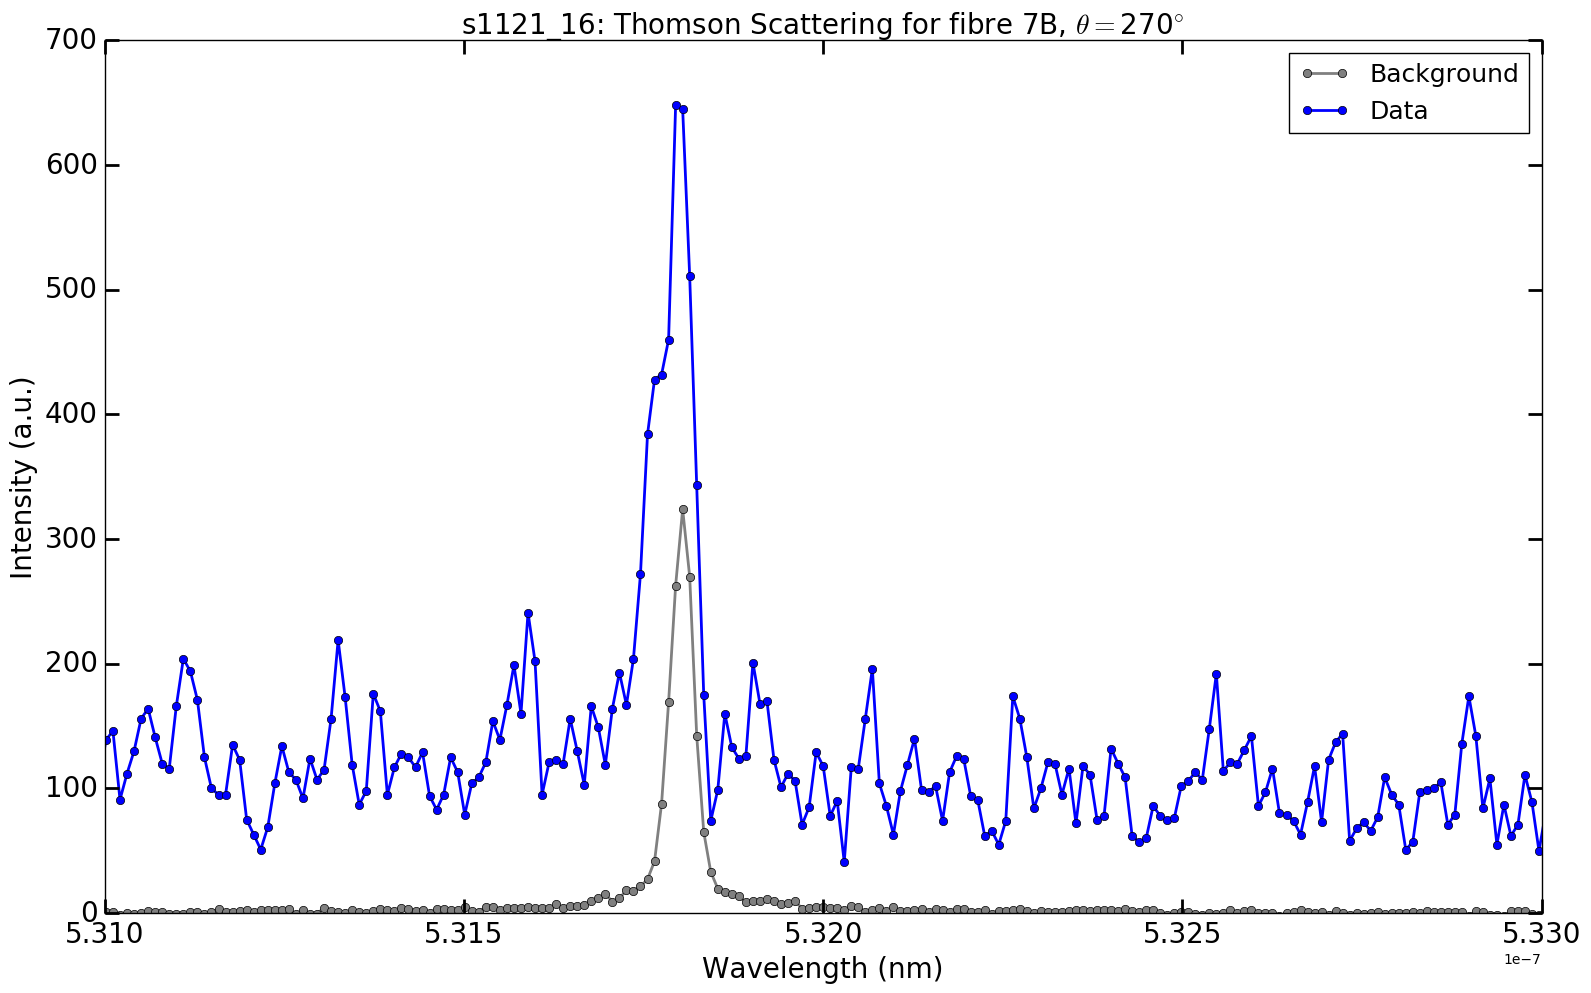

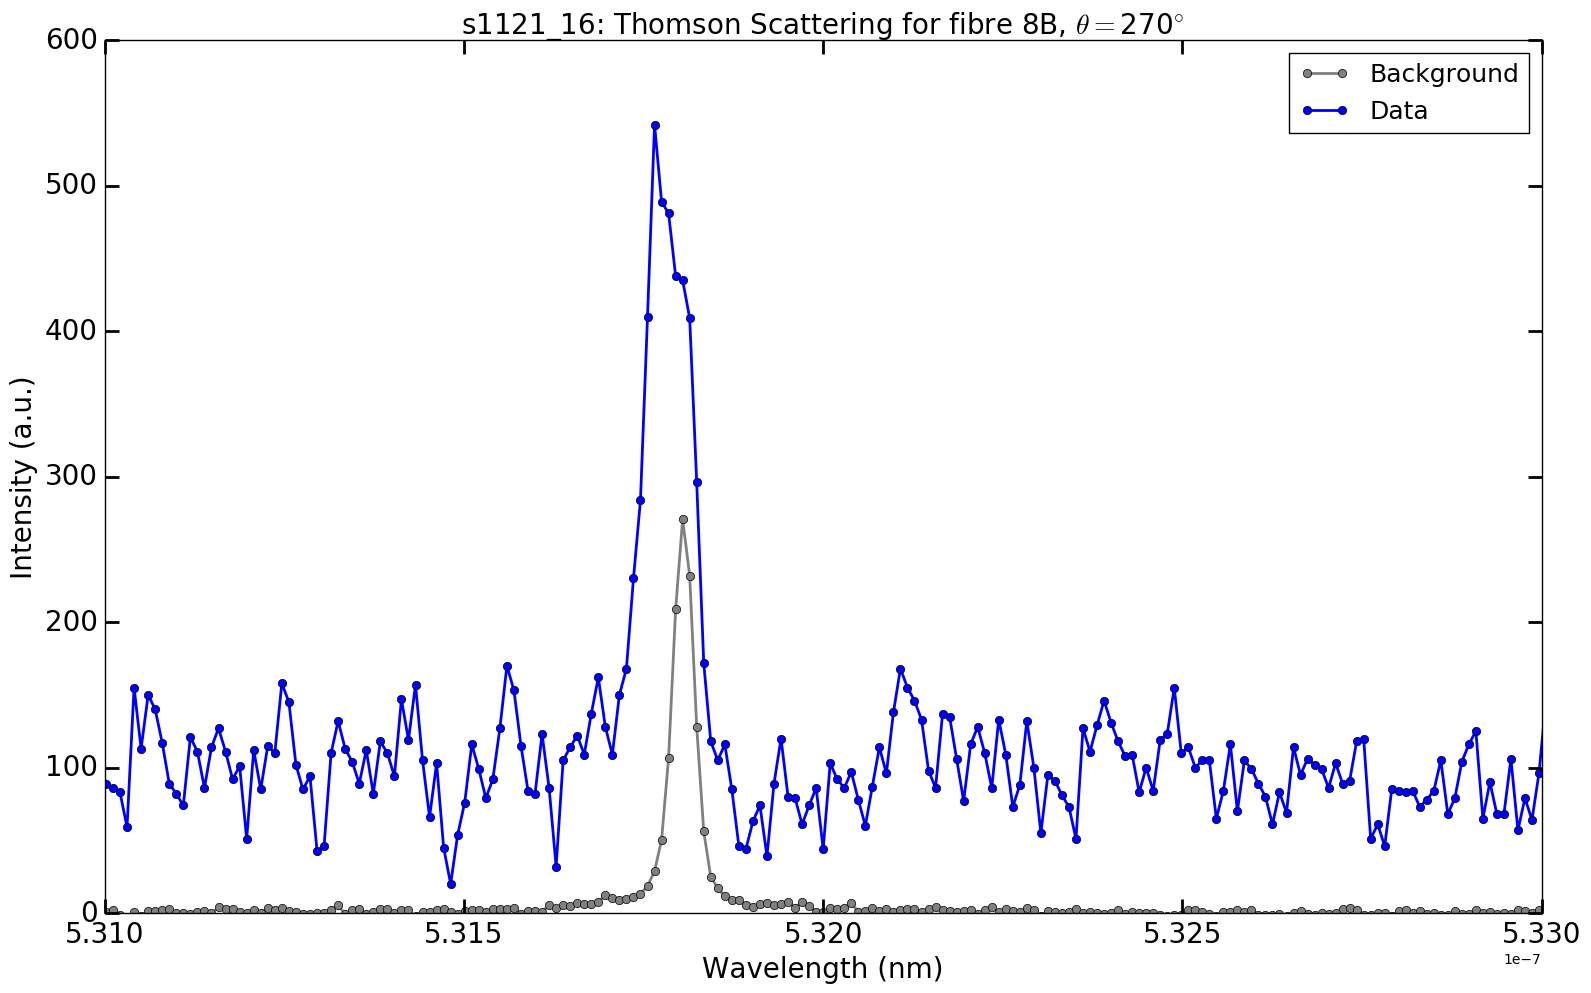

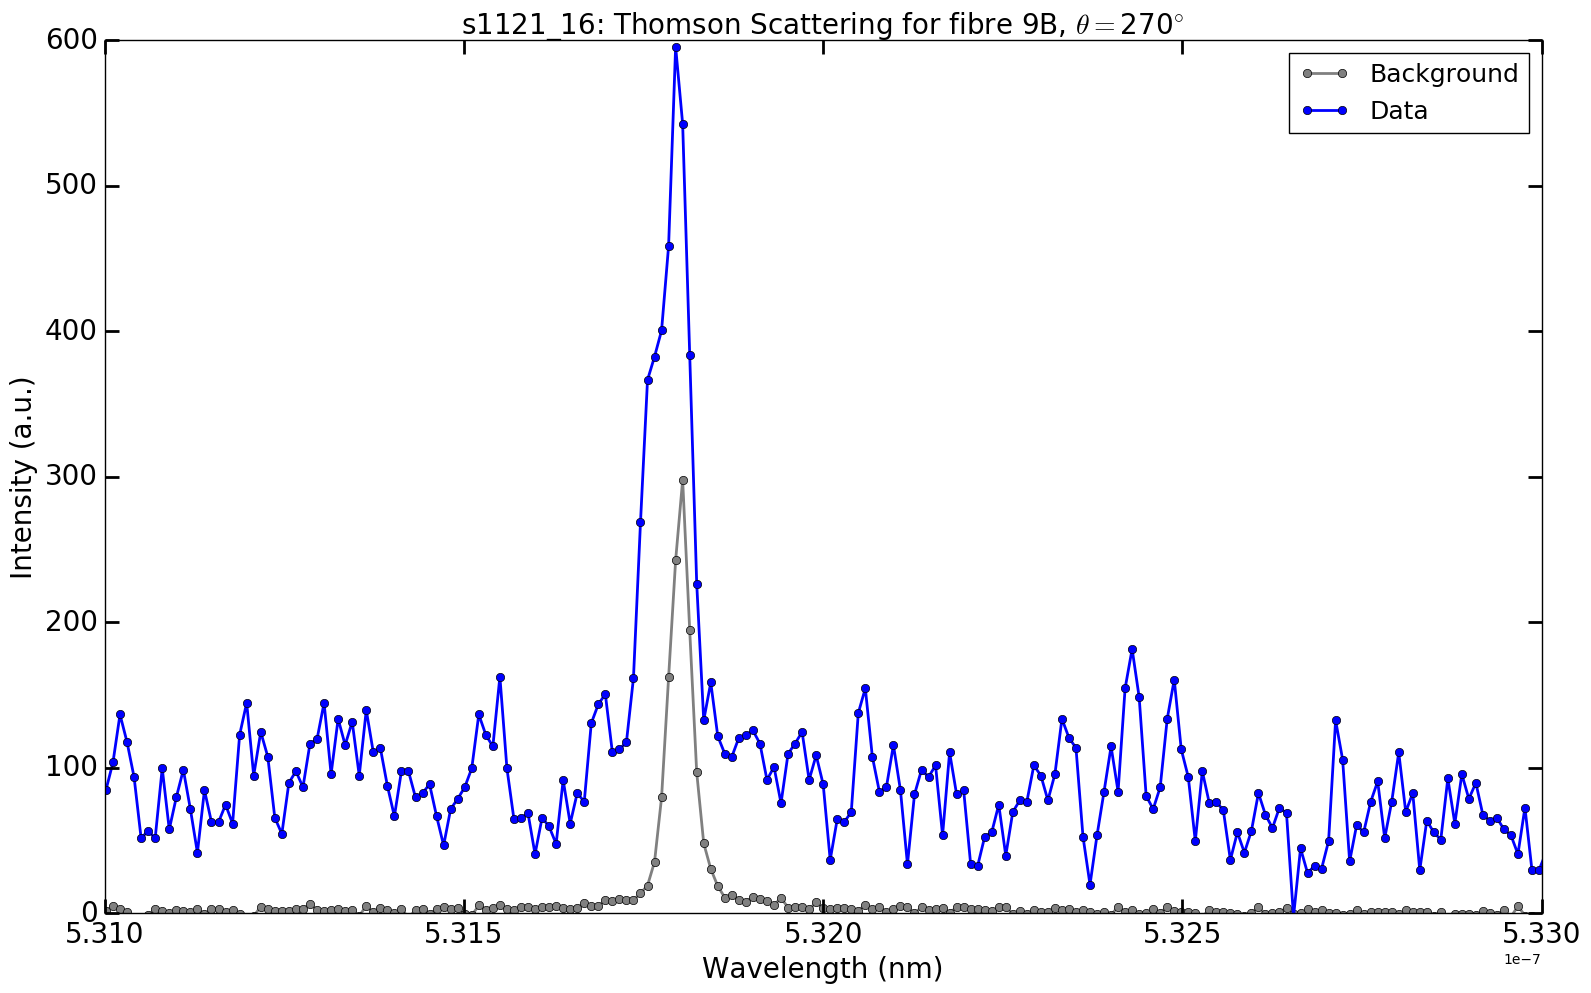

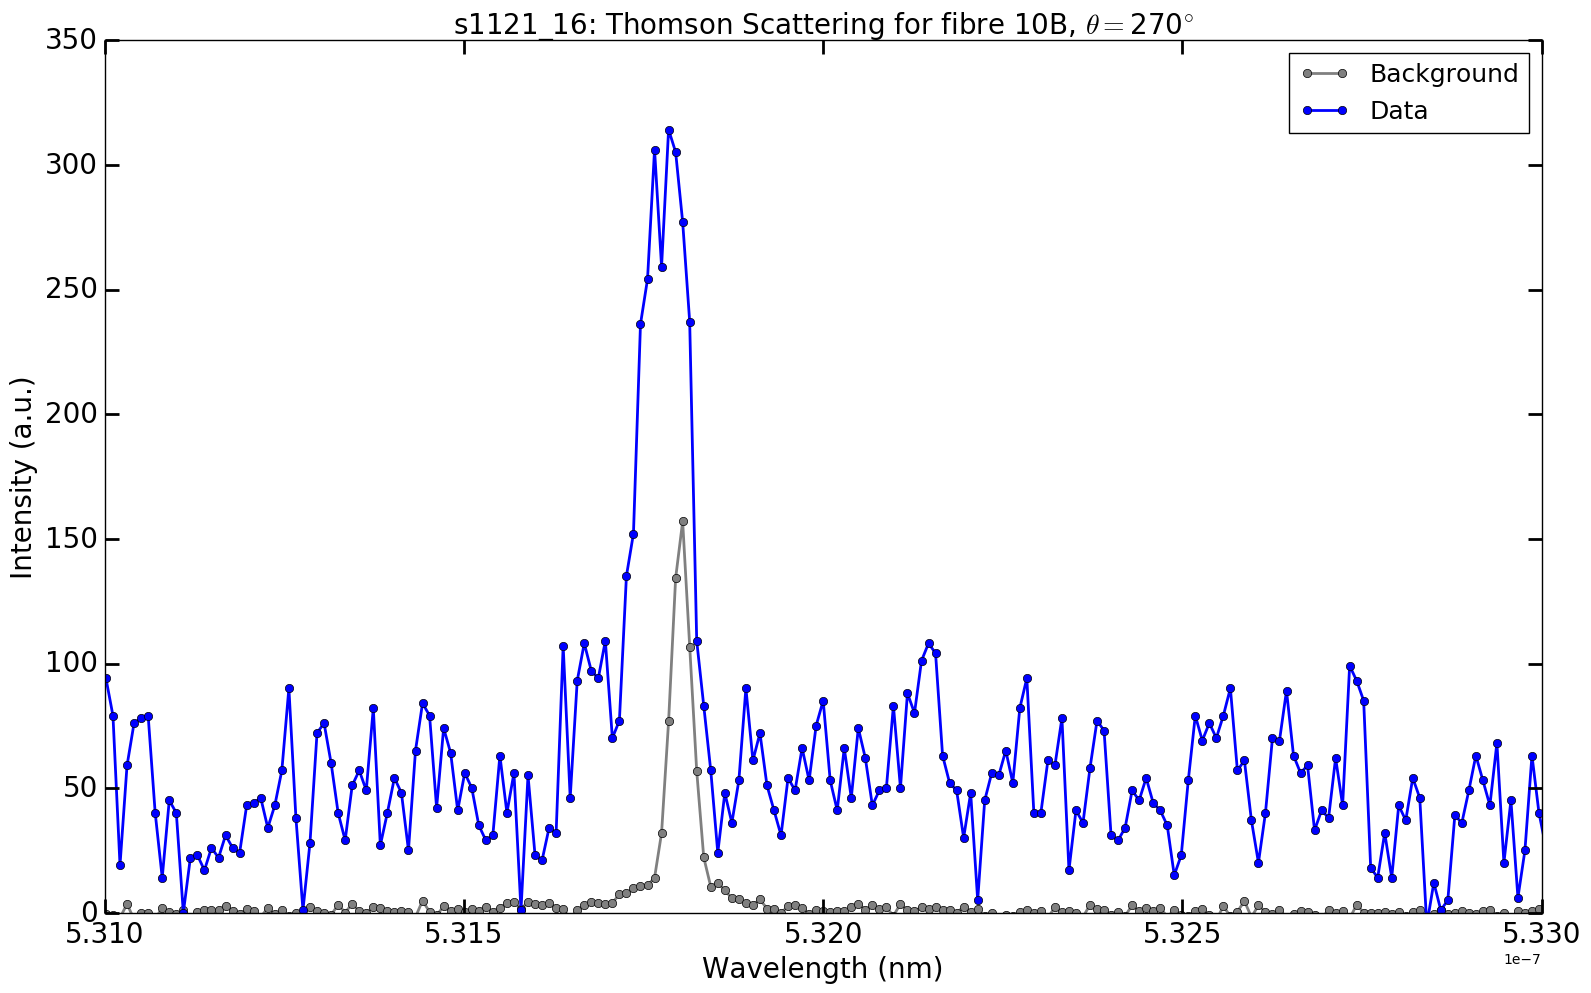

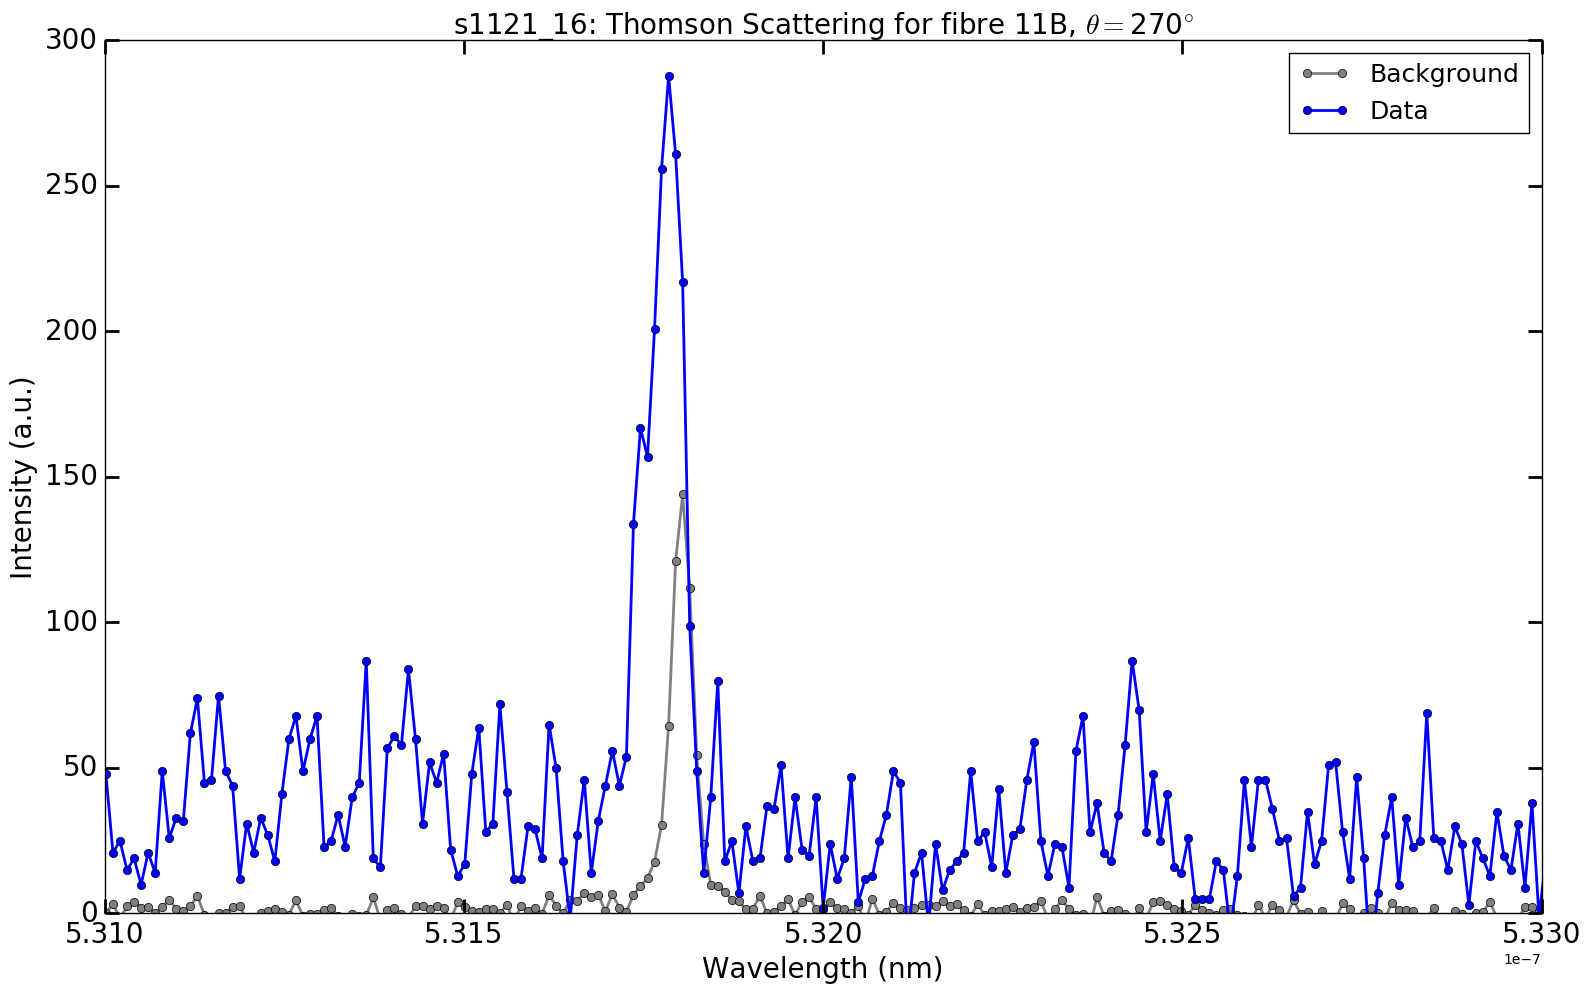

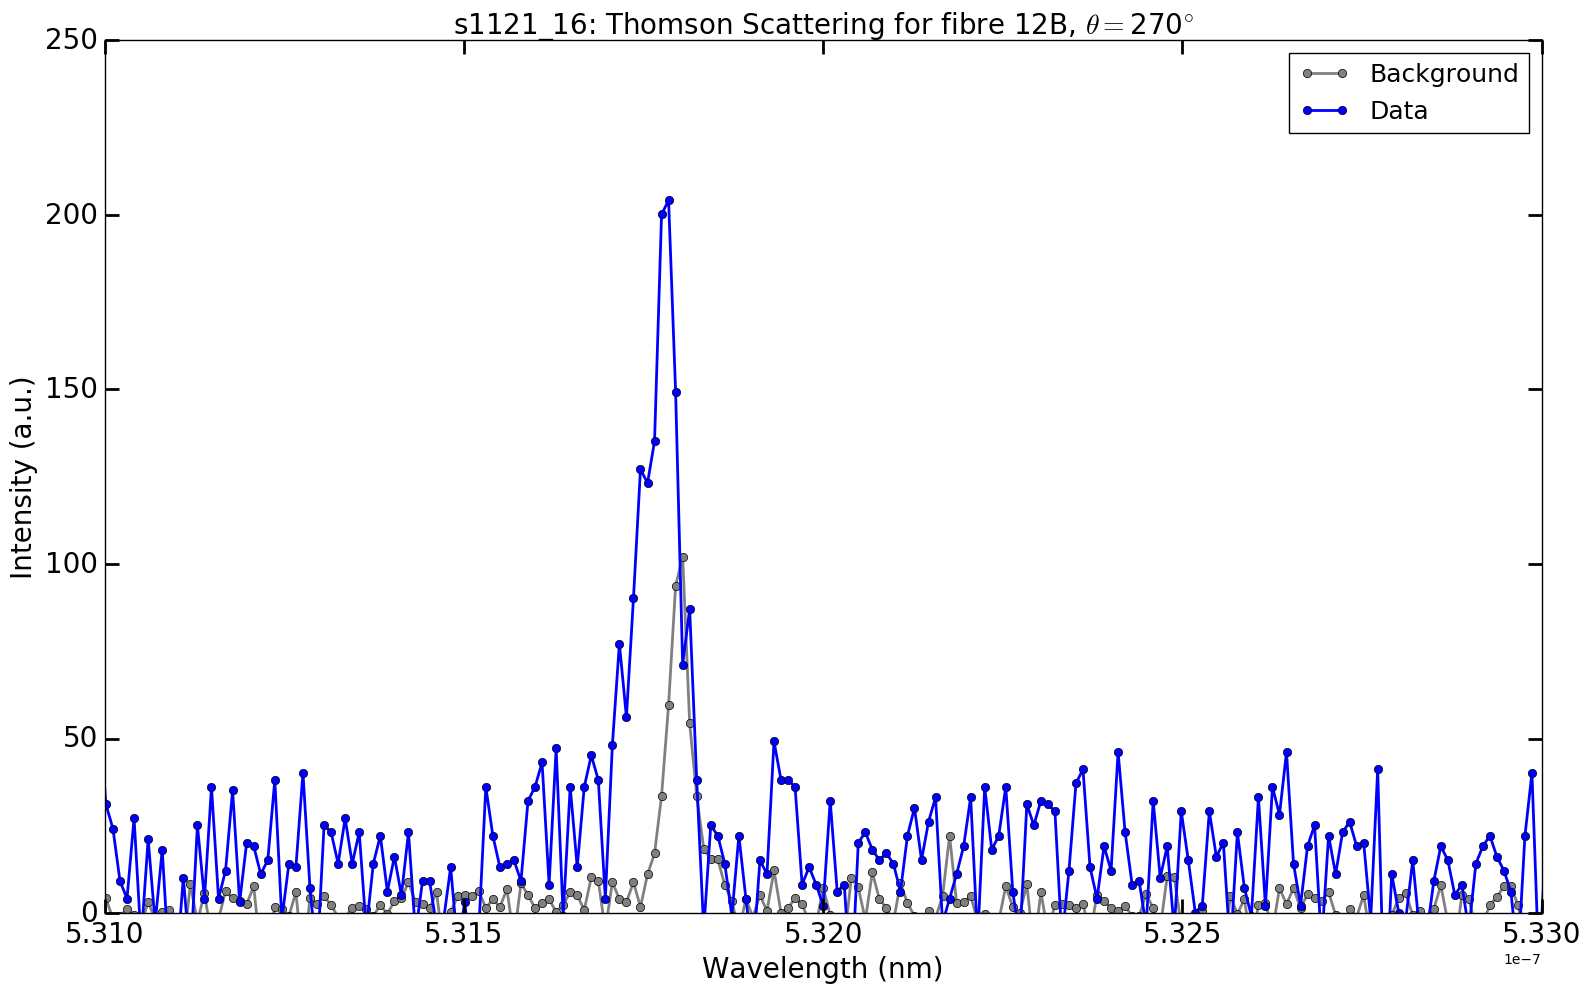

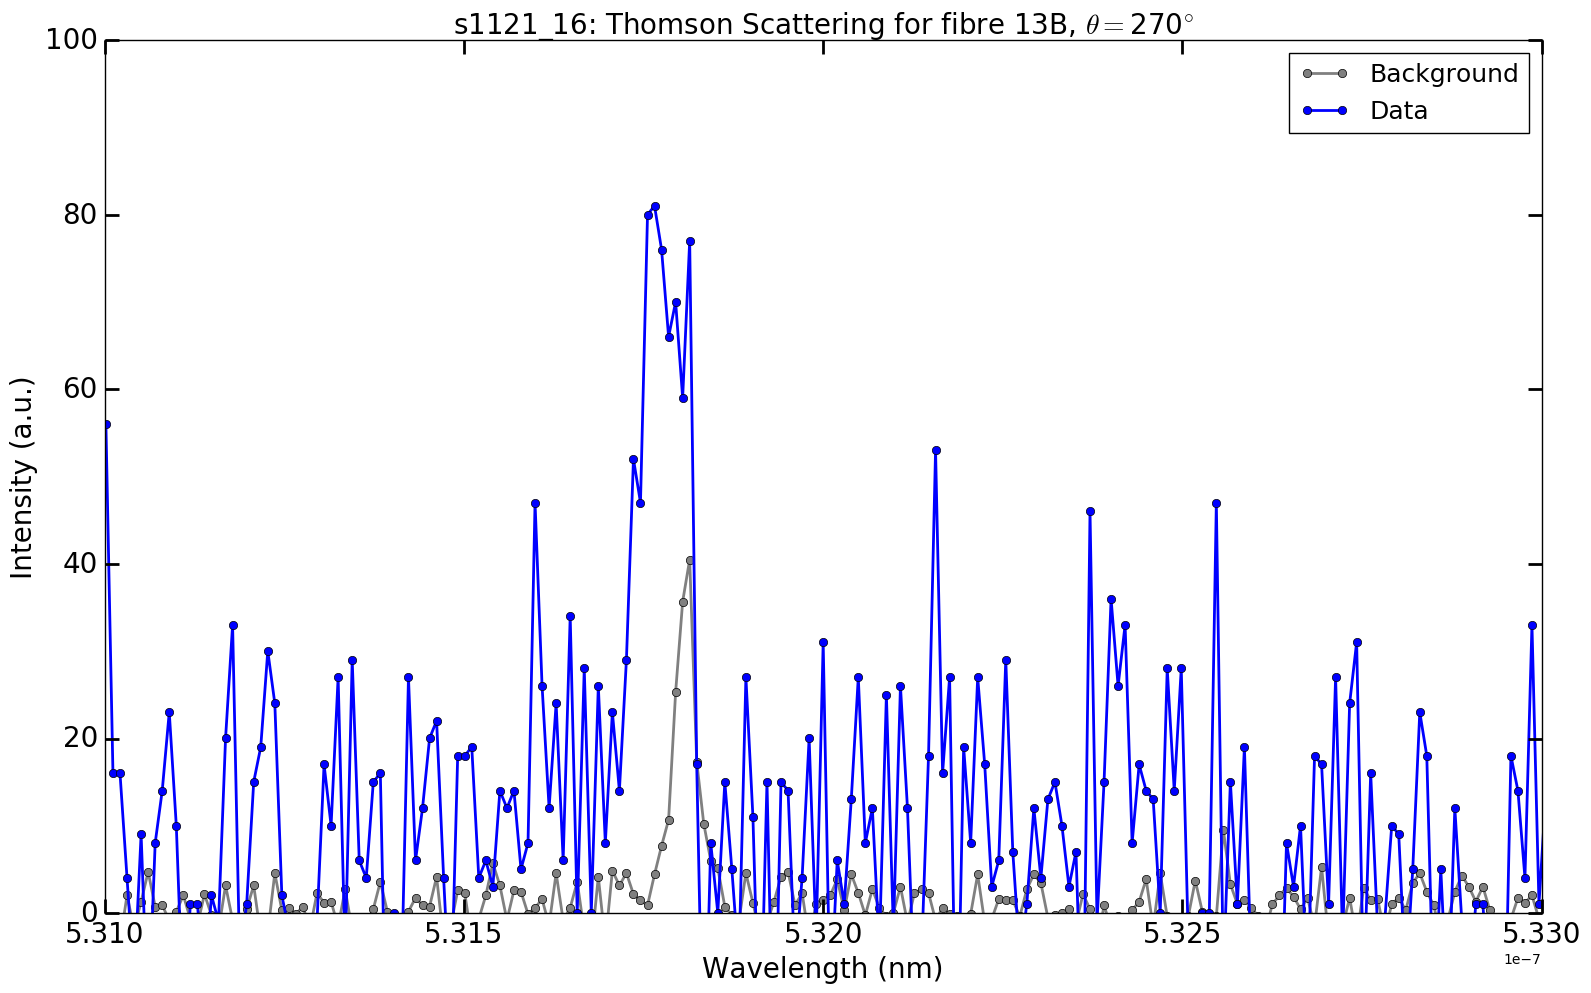

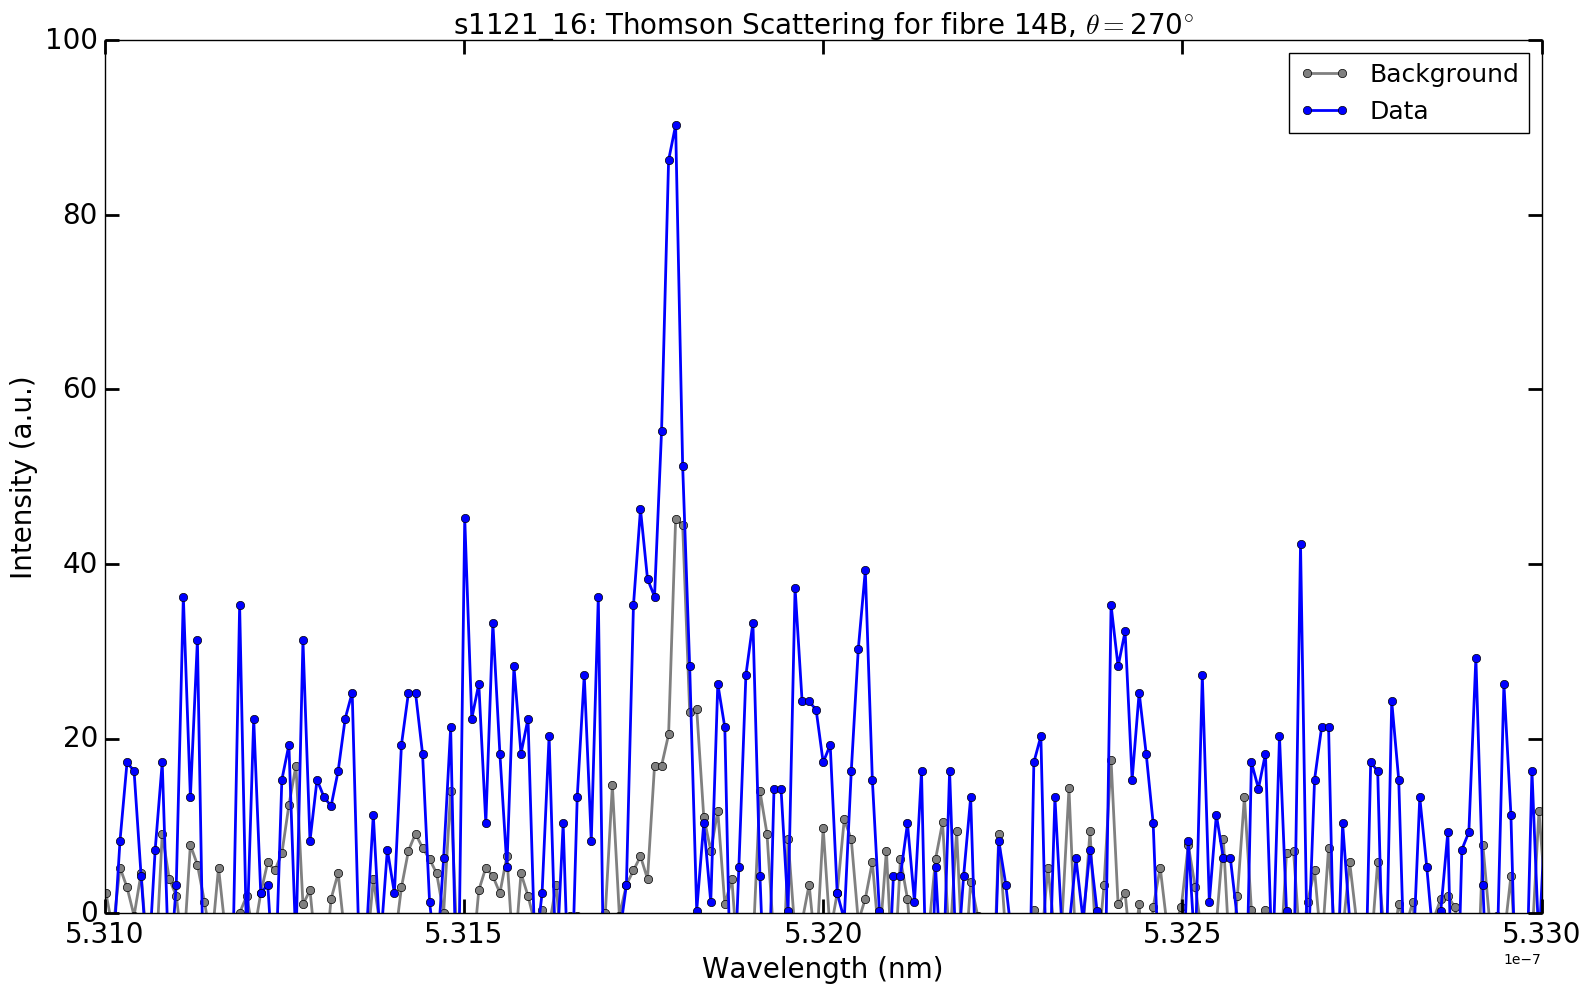

In [19]:
for i in range(1,15):
    ts.plot_data(Fnum=i, Fset='B')